# Employee Attrition
## Business Understanding

---

### Context

Employee attrition is a critical issue for organizations across industries. When experienced employees leave, it results in not only recruitment and training costs but also lost productivity, institutional knowledge, and potential damage to team morale. High attrition may indicate deeper organizational issues such as low employee satisfaction, lack of career growth, or poor management practices.

### Business Need

The organization seeks to understand the underlying drivers of employee attrition and proactively identify at-risk employees. A data-driven approach will help HR teams target retention efforts more efficiently, thereby minimizing attrition-related costs and improving organizational stability.

### Strategic Importance

- Improve employee engagement and job satisfaction
- Reduce turnover-related expenses
- Design better career development and benefits programs
- Strengthen workforce planning and talent management

---

## Problem Statement

The goal is to develop a machine learning model that predicts whether an employee is likely to leave the organization based on their demographic, job-related, and satisfaction-related attributes. The model will help the HR team prioritize interventions, design targeted policies, and improve retention.

**Key business questions include:**

- What are the most significant factors contributing to attrition?
- Can we accurately predict which employees are most likely to leave?
- How can these insights be used to reduce voluntary turnover?

The expected outcome is a predictive model that can identify at-risk employees with high reliability, along with interpretable insights to inform HR policies and practices.

---

**Dataset Link:** [IBM HR Analytics Employee Attrition & Performance Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

# Data Cleaning - Employee Attrition

---

##  Import Required Libraries

In [1]:
import pandas as pd

## Dataset Summary

| Attribute             | Value                                      |
|-----------------------|--------------------------------------------|
| Source                | IBM HR Analytics Employee Attrition Dataset ([Kaggle Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)) |
| Number of Rows        | 1,470                                      |
| Number of Columns     | 35                                         |
| Target Variable       | Attrition                                  |
| Data Types            | Numeric, Categorical, Ordinal              |

---

## Column Information

| Column Name                | Data Type      | Description                                                                 |
|----------------------------|---------------|-----------------------------------------------------------------------------|
| Age                        | Numeric       | Age of the employee (in years)                                              |
| Attrition                  | Categorical   | Whether the employee left the company (Yes/No)                              |
| BusinessTravel             | Categorical   | Frequency of business travel                                                |
| DailyRate                  | Numeric       | Daily wage rate of the employee                                             |
| Department                 | Categorical   | Department where the employee works (Sales, R&D, HR)                        |
| DistanceFromHome           | Numeric       | Distance from home to workplace (in kms)                                    |
| Education                  | Ordinal       | Education level (1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor)|
| EducationField             | Categorical   | Field of education                                                          |
| EmployeeCount              | Constant      | Number of employees (always 1, can be dropped)                              |
| EmployeeNumber             | Identifier    | Unique identifier for each employee (can be dropped)                        |
| EnvironmentSatisfaction    | Ordinal       | Satisfaction with the work environment (1–4)                                |
| Gender                     | Categorical   | Gender of the employee                                                      |
| HourlyRate                 | Numeric       | Hourly wage rate                                                            |
| JobInvolvement             | Ordinal       | Level of job involvement (1–4)                                              |
| JobLevel                   | Ordinal       | Job level within the organization (1–5)                                     |
| JobRole                    | Categorical   | Employee’s job role                                                         |
| JobSatisfaction            | Ordinal       | Job satisfaction level (1–4)                                                |
| MaritalStatus              | Categorical   | Marital status (Single/Married/Divorced)                                    |
| MonthlyIncome              | Numeric       | Monthly income                                                              |
| MonthlyRate                | Numeric       | Monthly wage rate                                                           |
| NumCompaniesWorked         | Numeric       | Number of companies worked at prior to current employer                     |
| Over18                     | Constant      | Whether over 18 (always 'Y', can be dropped)                                |
| OverTime                   | Categorical   | Whether the employee works overtime (Yes/No)                                |
| PercentSalaryHike          | Numeric       | Percentage salary increase                                                  |
| PerformanceRating          | Ordinal       | Performance rating (3–4)                                                    |
| RelationshipSatisfaction   | Ordinal       | Satisfaction with relationships at work (1–4)                               |
| StandardHours              | Constant      | Standard working hours (always 80, can be dropped)                          |
| StockOptionLevel           | Ordinal       | Stock option level (0–3)                                                    |
| TotalWorkingYears          | Numeric       | Total years of professional experience                                      |
| TrainingTimesLastYear      | Numeric       | Number of trainings attended last year                                      |
| WorkLifeBalance            | Ordinal       | Work-life balance rating (1–4)                                              |
| YearsAtCompany             | Numeric       | Years at the current company                                                |
| YearsInCurrentRole         | Numeric       | Years in the current role                                                   |
| YearsSinceLastPromotion    | Numeric       | Years since last promotion                                                  |
| YearsWithCurrManager       | Numeric       | Years with current manager                                                  |

---

#####  **Read the Input Data**

In [2]:
# Load the dataset
df = pd.read_csv('../resources/data/input/hr_employee_attrition.csv')

In [3]:
df.shape

(1470, 35)

This dataset consists of 1,470 records and 35 attributes pertaining to employee information within a company. 

#####  **Preview the Data**
Displaying the first few rows to understand the data structure and spot any initial anomalies.

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#####  **Check Missing Values**
It's important to identify missing or null values in the dataset before proceeding with analysis and modeling.

In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data types of each column
df.dtypes

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

##### **Check Duplicates**
We check for duplicate rows in the dataset to ensure each record represents a unique employee. Removing duplicates helps prevent data leakage and ensures model integrity.

In [6]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### **Check invalid values**
We review columns for any invalid or out-of-range values (e.g., negative ages, impossible ratings). Identifying and handling invalid values is important for maintaining data quality and reliable analysis.

In [8]:
# Check for invalid values in each column
column_values = {}

for column in df.columns:
    # Check for NaN values
    nan_count = df[column].isnull().sum()
    # Check for unique values count
    unique_values = df[column].unique()
    # Store results
    column_values[column] = {
        'nan_count': nan_count,
        'unique_values': unique_values
    }

# Print the column values summary
for column, checks in column_values.items():
    print(f"Column: {column}")
    print(f"  NaN Count: {checks['nan_count']}")
    print(f"  Unique Values: {checks['unique_values']}")
    print()

Column: Age
  NaN Count: 0
  Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Column: Attrition
  NaN Count: 0
  Unique Values: ['Yes' 'No']

Column: BusinessTravel
  NaN Count: 0
  Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: DailyRate
  NaN Count: 0
  Unique Values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 131

### Data Cleaning Summary

| Column Name              | NaN Count | Unique Value Count | Value Type     | Interpretability / Notes                                      |
|--------------------------|-----------|-------------------|----------------|---------------------------------------------------------------|
| Age                      | 0         | 43                | Numeric        | Broad range (18–60), appears valid                            |
| Attrition                | 0         | 2                 | Categorical    | Target variable, binary (Yes/No)                              |
| BusinessTravel           | 0         | 3                 | Categorical    | Travel frequency, business meaning                            |
| DailyRate                | 0         | 886               | Numeric        | Wide spread, appears valid                                    |
| Department               | 0         | 3                 | Categorical    | Sales, R&D, HR – interpretable                                |
| DistanceFromHome         | 0         | 29                | Numeric        | Small integer range, valid                                    |
| Education                | 0         | 5                 | Ordinal        | Education level (1–5), interpretable                          |
| EducationField           | 0         | 6                 | Categorical    | Valid fields                                                  |
| EmployeeCount            | 0         | 1                 | Constant       | All values = 1; drop from modeling                            |
| EmployeeNumber           | 0         | 1470              | Identifier     | Unique, drop from modeling                                    |
| EnvironmentSatisfaction  | 0         | 4                 | Ordinal        | Scale (1–4), interpretable                                    |
| Gender                   | 0         | 2                 | Categorical    | Male/Female                                                   |
| HourlyRate               | 0         | 71                | Numeric        | Valid, continuous                                             |
| JobInvolvement           | 0         | 4                 | Ordinal        | Scale (1–4), interpretable                                    |
| JobLevel                 | 0         | 5                 | Ordinal        | Levels (1–5), interpretable                                   |
| JobRole                  | 0         | 9                 | Categorical    | Business meaningful roles                                     |
| JobSatisfaction          | 0         | 4                 | Ordinal        | Scale (1–4), interpretable                                    |
| MaritalStatus            | 0         | 3                 | Categorical    | Single/Married/Divorced                                       |
| MonthlyIncome            | 0         | 1349              | Numeric        | Wide range, appears valid                                     |
| MonthlyRate              | 0         | 1427              | Numeric        | Wide range, appears valid                                     |
| NumCompaniesWorked       | 0         | 10                | Numeric        | Range (0–9), valid                                            |
| Over18                   | 0         | 1                 | Constant       | All values ‘Y’; drop from modeling                            |
| OverTime                 | 0         | 2                 | Categorical    | Yes/No, interpretable                                         |
| PercentSalaryHike        | 0         | 15                | Numeric        | Range (11–25), valid                                          |
| PerformanceRating        | 0         | 2                 | Ordinal        | (3, 4), low variance, check usefulness                        |
| RelationshipSatisfaction | 0         | 4                 | Ordinal        | Scale (1–4), interpretable                                    |
| StandardHours            | 0         | 1                 | Constant       | All values = 80; drop from modeling                           |
| StockOptionLevel         | 0         | 4                 | Ordinal        | Range (0–3), valid                                            |
| TotalWorkingYears        | 0         | 40                | Numeric        | Range (0–40), valid                                           |
| TrainingTimesLastYear    | 0         | 7                 | Numeric        | Range (0–6), valid                                            |
| WorkLifeBalance          | 0         | 4                 | Ordinal        | Scale (1–4), interpretable                                    |
| YearsAtCompany           | 0         | 37                | Numeric        | Range (0–40), valid                                           |
| YearsInCurrentRole       | 0         | 19                | Numeric        | Range (0–18), valid                                           |
| YearsSinceLastPromotion  | 0         | 16                | Numeric        | Range (0–15), valid                                           |
| YearsWithCurrManager     | 0         | 17                | Numeric        | Range (0–17), valid                                           |

**Interpretability Notes:**
- Missing Values: No missing values found in any column.
- Duplicate Rows: There are no duplicate entries within the dataset.
- Columns recommended for removal in modeling: `EmployeeCount`, `StandardHours`, `Over18` (constants), and `EmployeeNumber` (unique identifier).
- All other features are interpretable and relevant for EDA and modeling.

#####  **Write Output**
With the data now cleaned and validated, we export the processed dataset to a new file. This serves as the standardized input for further EDA, feature engineering, and modeling in the next steps of the project.

In [9]:
# Save the cleaned dataset
df.to_csv('../resources/data/output/hr_employee_attrition_cleaned.csv', index=False)

# Uncovering Attrition Drivers

---


## Objective
*A brief statement on the goal of this notebook: to explore the cleaned dataset, visualize relationships between features, and identify key variables that influence employee attrition.*


###  **Import Required Libraries**
We begin by importing essential libraries for data manipulation, visualization, and evaluation.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  **Read the Cleaned Data**

Load the Cleaned HR employee attrition dataset for EDA. 

In [11]:
# Load the dataset
df = pd.read_csv('../resources/data/output/hr_employee_attrition_cleaned.csv')

In [12]:
df.shape

(1470, 35)

### **Exploratory Data Analysis (EDA)**

#### Remove Invariant and Identifier Columns

Certain columns either contain only a single unique value (invariant) or act as unique identifiers. These do not contribute to modeling or exploratory analysis and will be removed to simplify the dataset.

Columns to remove:
- EmployeeNumber (unique identifier)
- EmployeeCount (constant)
- StandardHours (constant)
- Over18 (constant)

In [13]:
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=cols_to_drop)

In [14]:
df.shape

(1470, 31)

#### Numerical Columns

**Note:** Some features, though stored as integers, are actually ordinal or categorical. For example:
- Education: 1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor
- Satisfaction and involvement ratings: 1–4
- JobLevel, StockOptionLevel: Represent categorical levels, not continuous values

These will be treated as categorical/ordinal in EDA and potentially in modeling (e.g., using one-hot or ordinal encoding if required).

In [15]:
# Continuous variables
cont_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
             'TotalWorkingYears', 'TrainingTimesLastYear', 
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Ordinal features stored as numbers
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

#### Categorical Columns

In [16]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

#### **1. Descriptive Summary Statistics**

In [17]:
# Summary statistics for numerical columns
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0


#### Continuous Numerical Feature Summary

| Feature                 | Interpretation |
|-------------------------|---------------|
| **Age**                 | The employee ages range from 18 to 60, with a mean age of about 37. The interquartile range (IQR: 30 to 43) shows that most employees are in their 30s or early 40s, which is typical for a general workforce. |
| **DailyRate**           | Daily rates span from 102 to 1499, with an average of 802 and a high standard deviation (403). This suggests considerable variation in compensation, potentially due to differences in job roles or levels. |
| **DistanceFromHome**    | The average distance employees travel from home to work is about 9 km, with most (IQR: 2 to 14 km) living fairly close to their workplace. The maximum is 29 km, so few employees have a very long commute. |
| **HourlyRate**          | Hourly rates are distributed between 30 and 100, with a mean of about 66. The distribution appears fairly even, with moderate spread (std: 20).|
| **MonthlyIncome**       | Monthly incomes vary widely, from 1,009 to 19,999, with an average of 6,503. The high standard deviation (4,708) and a wide IQR (2,911 to 8,379) suggest significant income disparity, possibly reflecting different roles, levels, or tenure. |
| **MonthlyRate**         | The monthly wage rate also has a large range (2,094 to 26,999) and a mean of 14,313. The high spread (std: 7,118) may indicate diverse compensation packages. |
| **NumCompaniesWorked**  | Employees have worked at 0 to 9 companies before, with a mean of 2.7. Most have worked at one or two prior companies, but there are employees with a high number of prior employers, suggesting varied career histories. |
| **TotalWorkingYears**   | Work experience ranges from 0 to 40 years, with a mean of 11.3 years. The IQR (6 to 15) shows that the typical employee has significant experience, but there are some with very high or low experience levels. |
| **TrainingTimesLastYear** | The number of trainings attended last year ranges from 0 to 6, with an average of 2.8. Most employees attended 2 or 3 trainings, which may indicate a moderate emphasis on upskilling. |
| **YearsAtCompany**      | Tenure at the company varies from 0 to 40 years, with a mean of 7 years. The IQR (3 to 9) suggests that while many employees are relatively new, some have very long tenure. |
| **YearsInCurrentRole**  | Employees have held their current role from 0 to 18 years, with a mean of 4.2. The median is 3, indicating many employees are relatively early in their roles. |
| **YearsSinceLastPromotion** | Time since last promotion ranges from 0 to 15 years, with a mean of 2.2 years. The median is 1, meaning most employees have been promoted fairly recently, but some have not had a promotion in many years. |
| **YearsWithCurrManager** | Time with the current manager ranges from 0 to 17 years, with a mean of 4.1. The median is 3 years, showing many employees have not changed managers recently. |

**Observations:**
- Most features have a reasonable spread with a few possible outliers (e.g., very high values for tenure, income, or distance).
- Several features (YearsAtCompany, TotalWorkingYears) have maximum values much greater than the 75th percentile, suggesting the presence of long-tenure or highly experienced outliers.
- These statistics provide a foundation for further EDA, such as visualizing distributions and checking for relationships with attrition.

In [18]:
for col in ordinal_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().sort_index())


Education value counts:
Education
1    170
2    282
3    572
4    398
5     48
Name: count, dtype: int64

EnvironmentSatisfaction value counts:
EnvironmentSatisfaction
1    284
2    287
3    453
4    446
Name: count, dtype: int64

JobInvolvement value counts:
JobInvolvement
1     83
2    375
3    868
4    144
Name: count, dtype: int64

JobLevel value counts:
JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

JobSatisfaction value counts:
JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64

PerformanceRating value counts:
PerformanceRating
3    1244
4     226
Name: count, dtype: int64

RelationshipSatisfaction value counts:
RelationshipSatisfaction
1    276
2    303
3    459
4    432
Name: count, dtype: int64

StockOptionLevel value counts:
StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

WorkLifeBalance value counts:
WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


#### Ordinal Feature Distributions

| Feature                  | Interpretation |
|--------------------------|----------------|
| **Education**            | Most employees hold a Bachelor’s (3) or Master’s (4) degree, with few at Doctorate (5) or below College (1); indicates a highly educated workforce. |
| **EnvironmentSatisfaction** | Ratings are mostly high (3 or 4); lower satisfaction is less common, suggesting generally positive perceptions of the work environment. |
| **JobInvolvement**       | Most rate their involvement as 3 or 2; few at the extremes, showing moderate engagement. |
| **JobLevel**             | Majority are in entry/mid-level positions (1 or 2); fewer in higher roles, reflecting a typical organizational pyramid. |
| **JobSatisfaction**      | Most employees are satisfied (3 or 4); low satisfaction (1 or 2) is less common. |
| **PerformanceRating**    | Nearly all have a rating of 3, few at 4; limited variance may reduce predictive power. |
| **RelationshipSatisfaction** | Most rate satisfaction as high (3 or 4); few are dissatisfied. |
| **StockOptionLevel**     | Majority at lower levels (0 or 1); higher levels are rare and may be reserved for senior staff. |
| **WorkLifeBalance**      | Most rate balance as good (3), with some at 2 or 4; very poor (1) is rare, indicating positive work-life perceptions. |

**Observation:**  
- Most ordinal features are skewed towards higher satisfaction and involvement, and the majority of employees are in lower to mid job levels. 
- Performance ratings show little variance, which may affect their usefulness as a predictive feature. These distributions highlight areas of organizational strength and opportunities for improvement.

In [19]:
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts().sort_index())


Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel value counts:
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: count, dtype: int64

Department value counts:
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: count, dtype: int64

EducationField value counts:
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: count, dtype: int64

Gender value counts:
Gender
Female    588
Male      882
Name: count, dtype: int64

JobRole value counts:
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative

| Feature         | Interpretation |
|-----------------|---------------|
| **Attrition**   | Most employees have not left the company (No: 1233 vs. Yes: 237), showing significant class imbalance (attrition rate ≈ 16%). |
| **BusinessTravel** | The majority travel rarely (1043); only a few travel frequently (277) or not at all (150). |
| **Department**  | Most employees are in Research & Development (961), followed by Sales (446); few in Human Resources (63). |
| **EducationField** | Most have backgrounds in Life Sciences (606) or Medical (464); other fields are much less represented. |
| **Gender**      | The workforce is male-dominated (882 males vs. 588 females). |
| **JobRole**     | Largest groups are Research Scientist (292), Sales Executive (326), and Laboratory Technician (259); smallest are Sales Representative (83) and Human Resources (52). |
| **MaritalStatus** | Majority are Married (673) or Single (470); fewer are Divorced (327). |
| **OverTime**    | Most employees do not work overtime (No: 1054); a significant minority do (Yes: 416). |


**Observations:**  
- Most categorical features are dominated by a few major groups—for example, the majority of employees work in Research & Development, have backgrounds in Life Sciences or Medical fields, and travel rarely for business.
- The dataset is male-dominated and most employees are married or single, reflecting typical workforce patterns in similar industries.
- Attrition is significantly imbalanced, with far fewer employees leaving the company compared to those staying—this class imbalance will require special attention during modeling.
- Job roles and departments are varied, but certain roles (such as Research Scientist, Sales Executive, and Laboratory Technician) make up the largest segments of the workforce.
- Overtime work is not the norm, but a substantial minority of employees do work overtime, which may be important for understanding attrition and satisfaction patterns.

#### **2. Univariate Analysis**

#### Continuous Features: Histograms

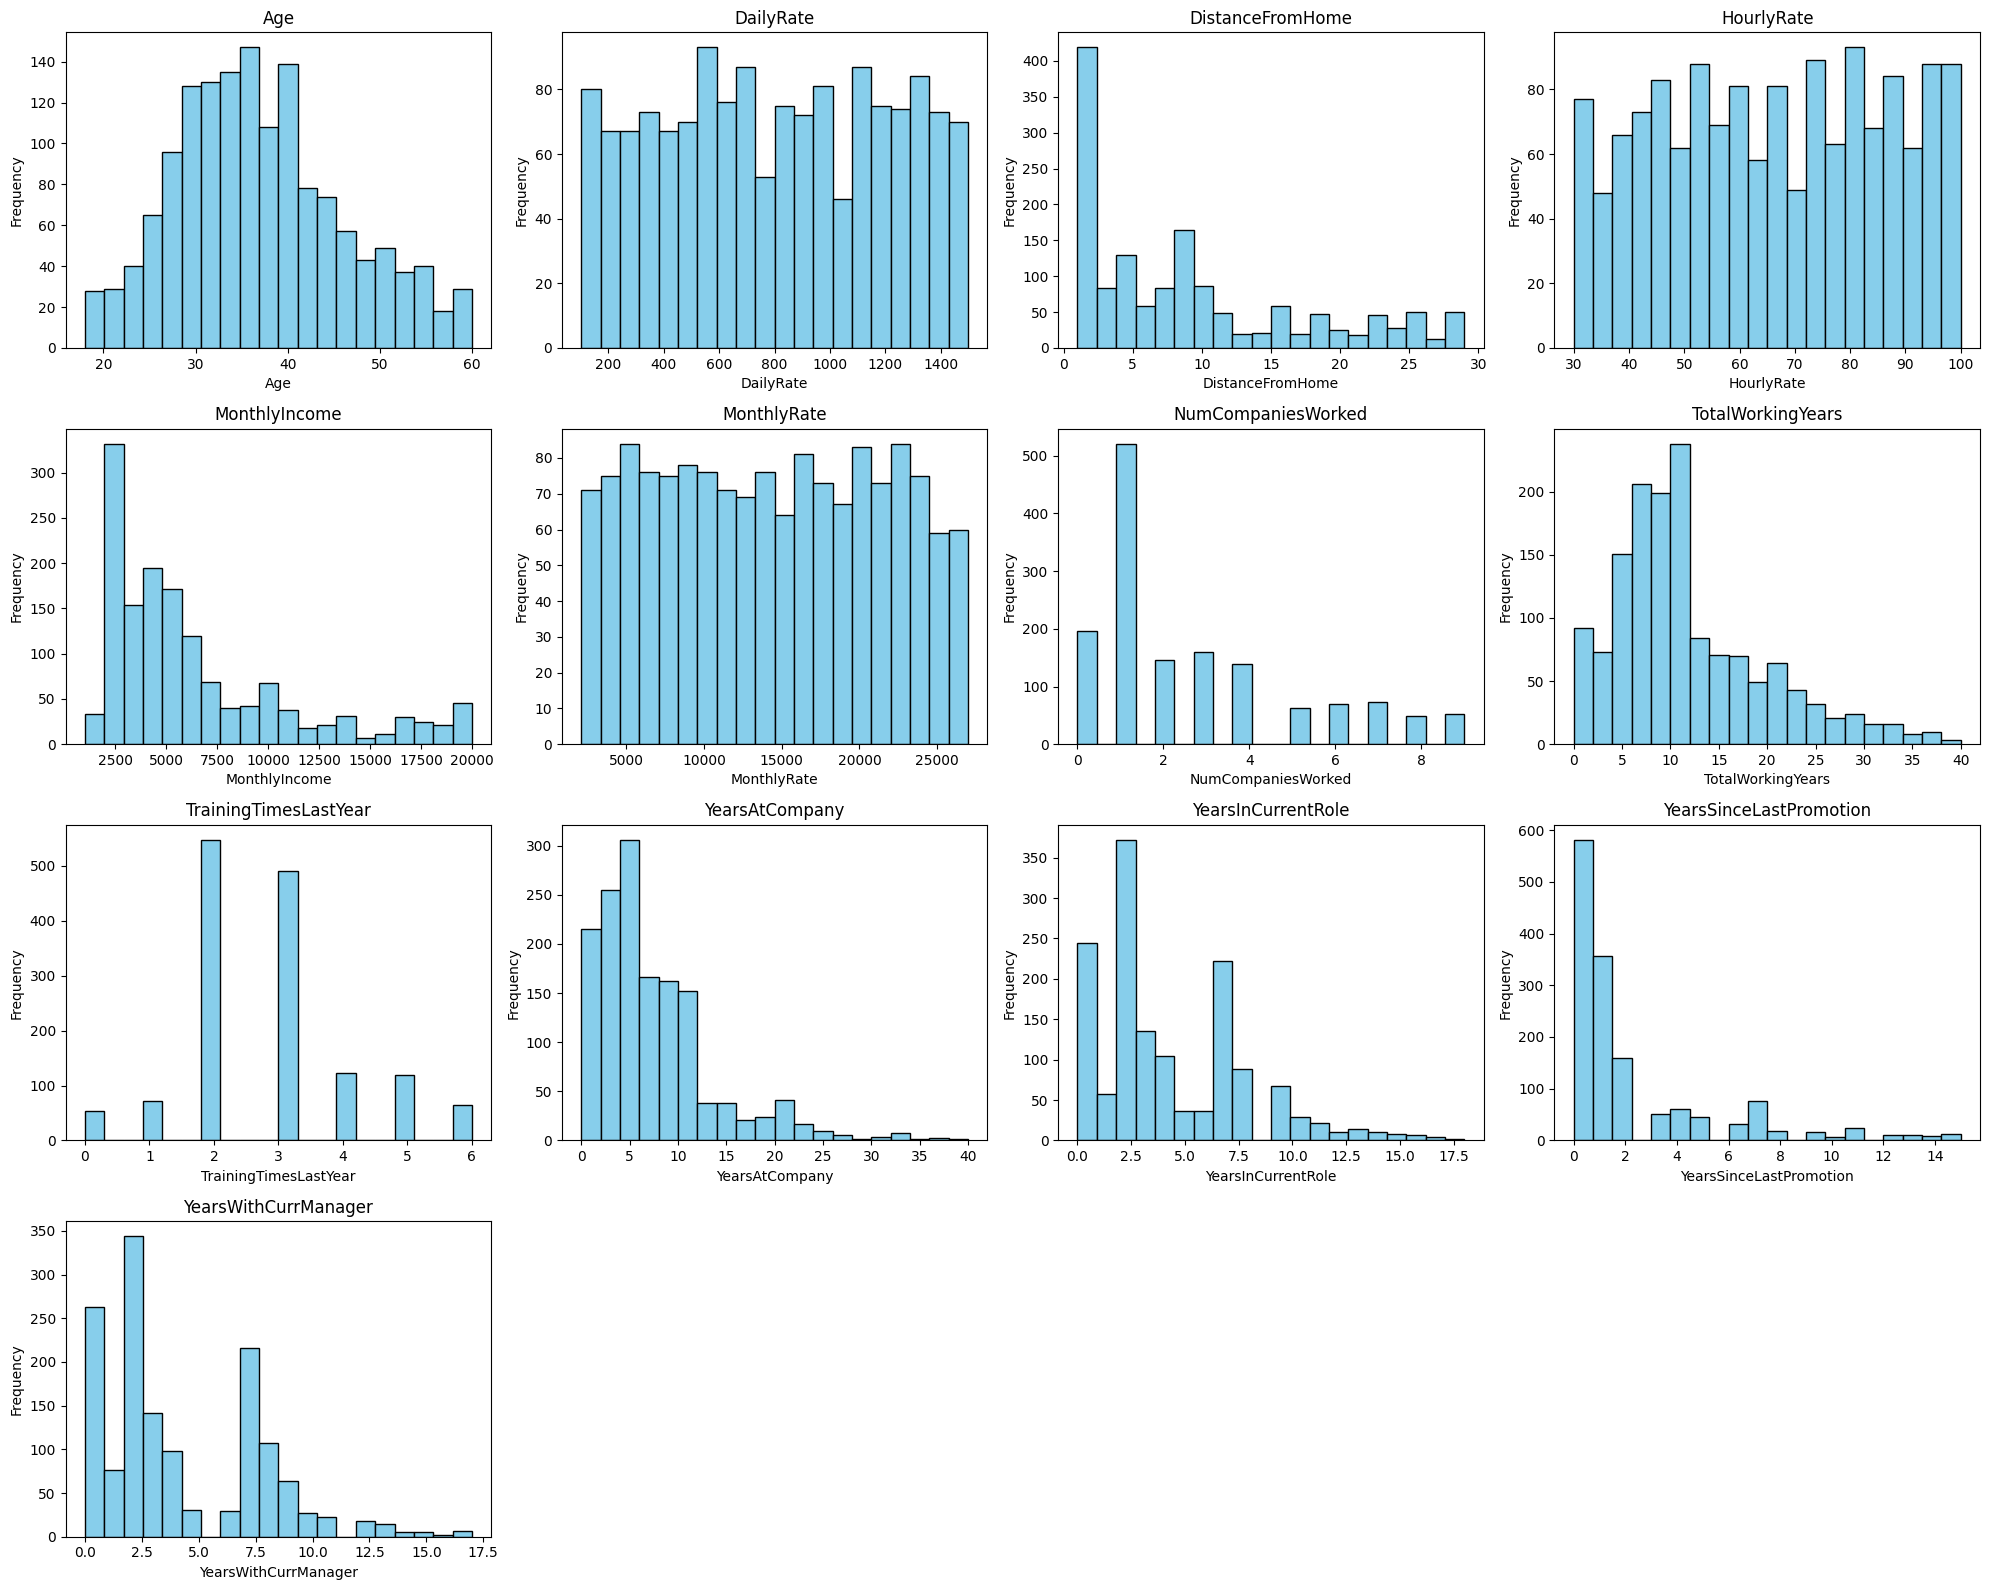

In [20]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

| Feature                     | Interpretation |
|-----------------------------|----------------|
| **Age**                     | Roughly normal distribution; most employees are in their 30s–40s, with fewer very young or very old employees. |
| **DailyRate**               | Fairly uniform distribution; wide range with no strong clustering at specific values. |
| **DistanceFromHome**        | Right-skewed; most employees live close to work, a minority commute long distances. |
| **HourlyRate**              | Nearly uniform; hourly rates are spread evenly across the range. |
| **MonthlyIncome**           | Strong right skew; most earn on the lower end, with a long tail of high earners. |
| **MonthlyRate**             | Almost uniform distribution, suggesting pay rates are widely spread. |
| **NumCompaniesWorked**      | Most have worked at 0–2 prior companies; some have much more varied career histories. |
| **TotalWorkingYears**       | Right-skewed; most have 5–15 years experience, few have long careers. |
| **TrainingTimesLastYear**   | Peaks at 2 and 3 trainings; these are the most common training frequencies. |
| **YearsAtCompany**          | Right-skewed; most employees are relatively new (<10 years), with some long-tenure outliers. |
| **YearsInCurrentRole**      | Most have held their current role less than 5 years; few have long-term incumbency. |
| **YearsSinceLastPromotion** | Heavily skewed to 0–1 years; promotions occur recently for many, few with long intervals since last promotion. |
| **YearsWithCurrManager**    | Most have been with their current manager less than 5 years; long-term relationships are uncommon. |

#### Ordinal Features: Bar Charts

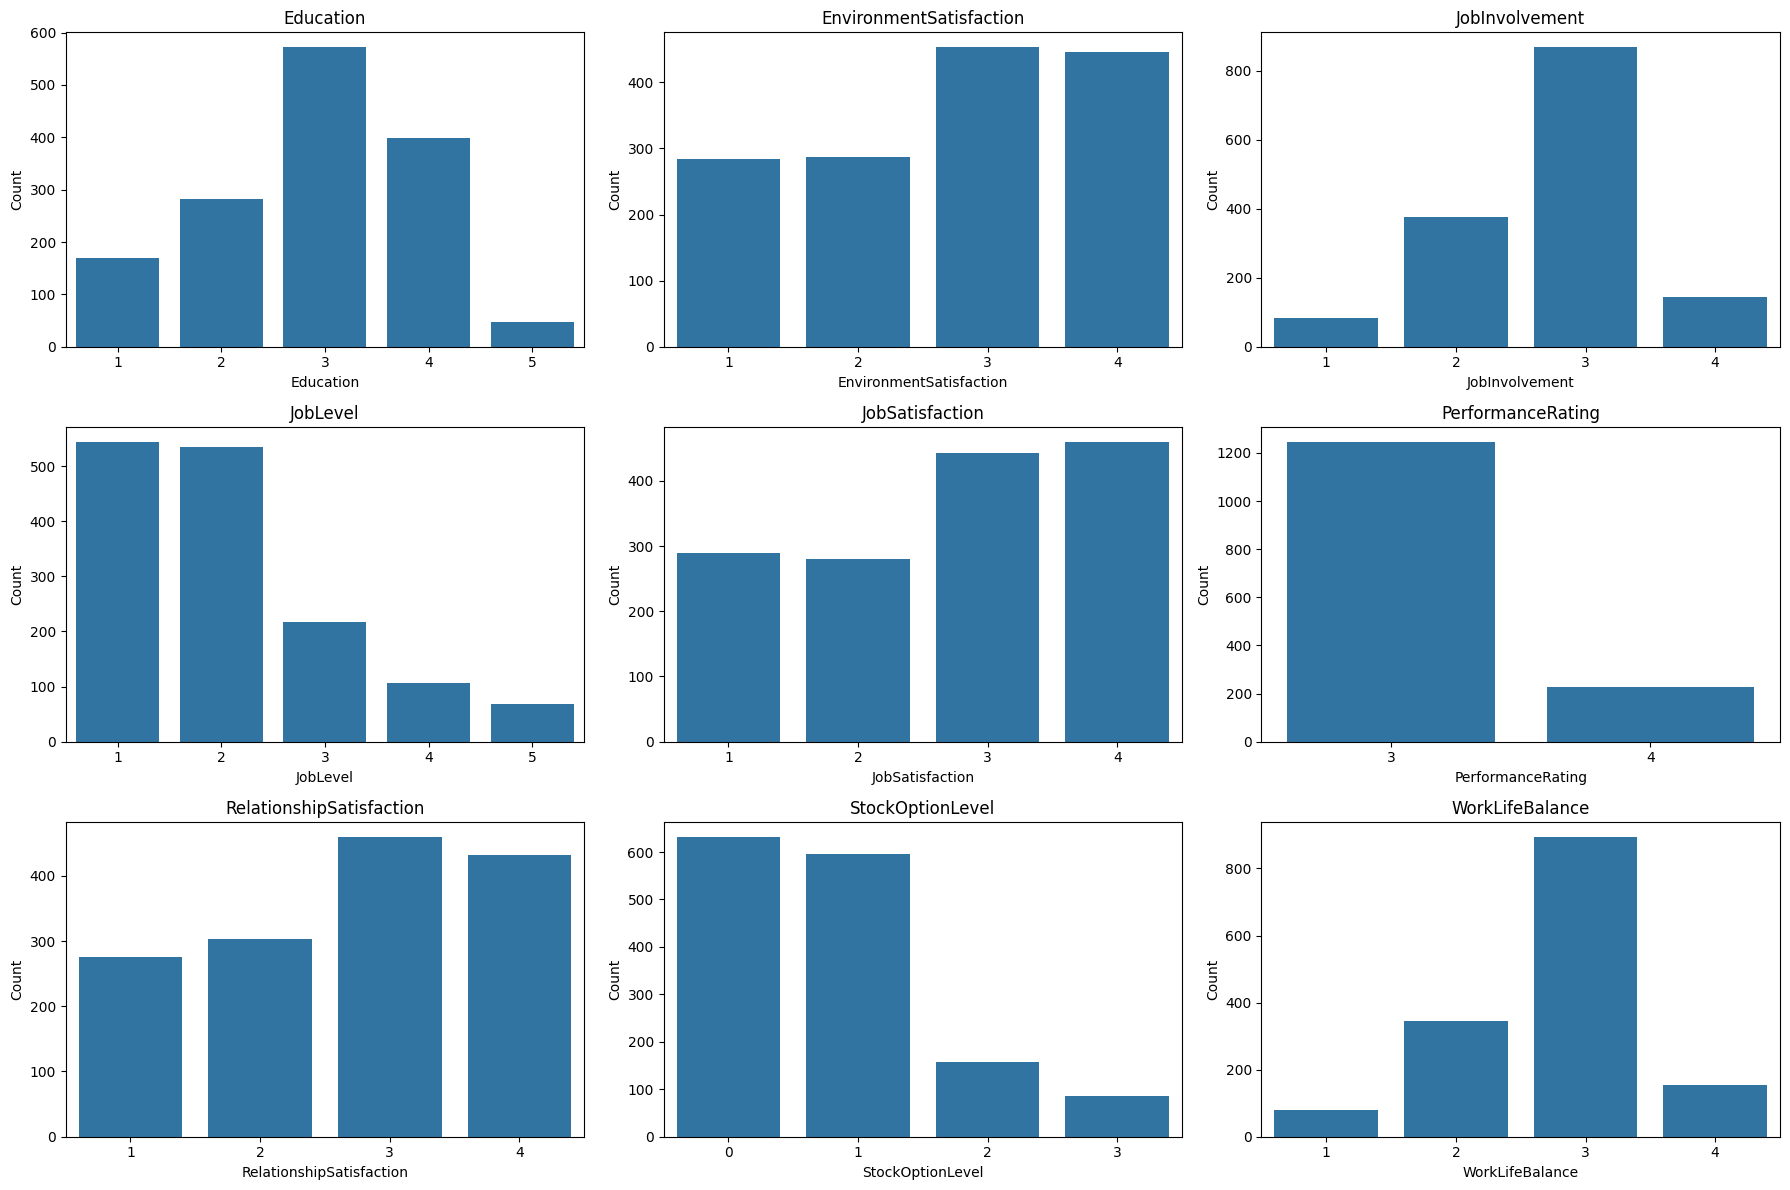

In [21]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

| Feature                    | Interpretation |
|----------------------------|----------------|
| **Education**              | Most employees hold a Bachelor’s (3) or Master’s (4) degree; very few have a Doctorate (5) or below College (1). Indicates a highly educated workforce. |
| **EnvironmentSatisfaction**| Satisfaction is skewed high; most employees rate 3 or 4, suggesting overall positive perceptions. |
| **JobInvolvement**         | The majority rate involvement at 3, with few at the extremes (1, 4). Most employees feel moderately involved. |
| **JobLevel**               | Most are in lower to mid job levels (1, 2); higher job levels (4, 5) are much less common, reflecting a typical organizational pyramid. |
| **JobSatisfaction**        | Most employees are satisfied (ratings 3 or 4); dissatisfaction (1, 2) is less frequent. |
| **PerformanceRating**      | Nearly all have a rating of 3; very few have a 4. Indicates low variance in performance appraisal. |
| **RelationshipSatisfaction**| Majority are satisfied (3, 4), with few rating low satisfaction (1, 2). Reflects positive workplace relationships. |
| **StockOptionLevel**       | Most are at level 0 or 1; higher levels are rare, possibly reserved for senior roles. |
| **WorkLifeBalance**        | Most employees rate their balance as 3; very few rate it as poor (1). Indicates a generally positive work-life perception. |

#### Categorical Features: Bar Charts

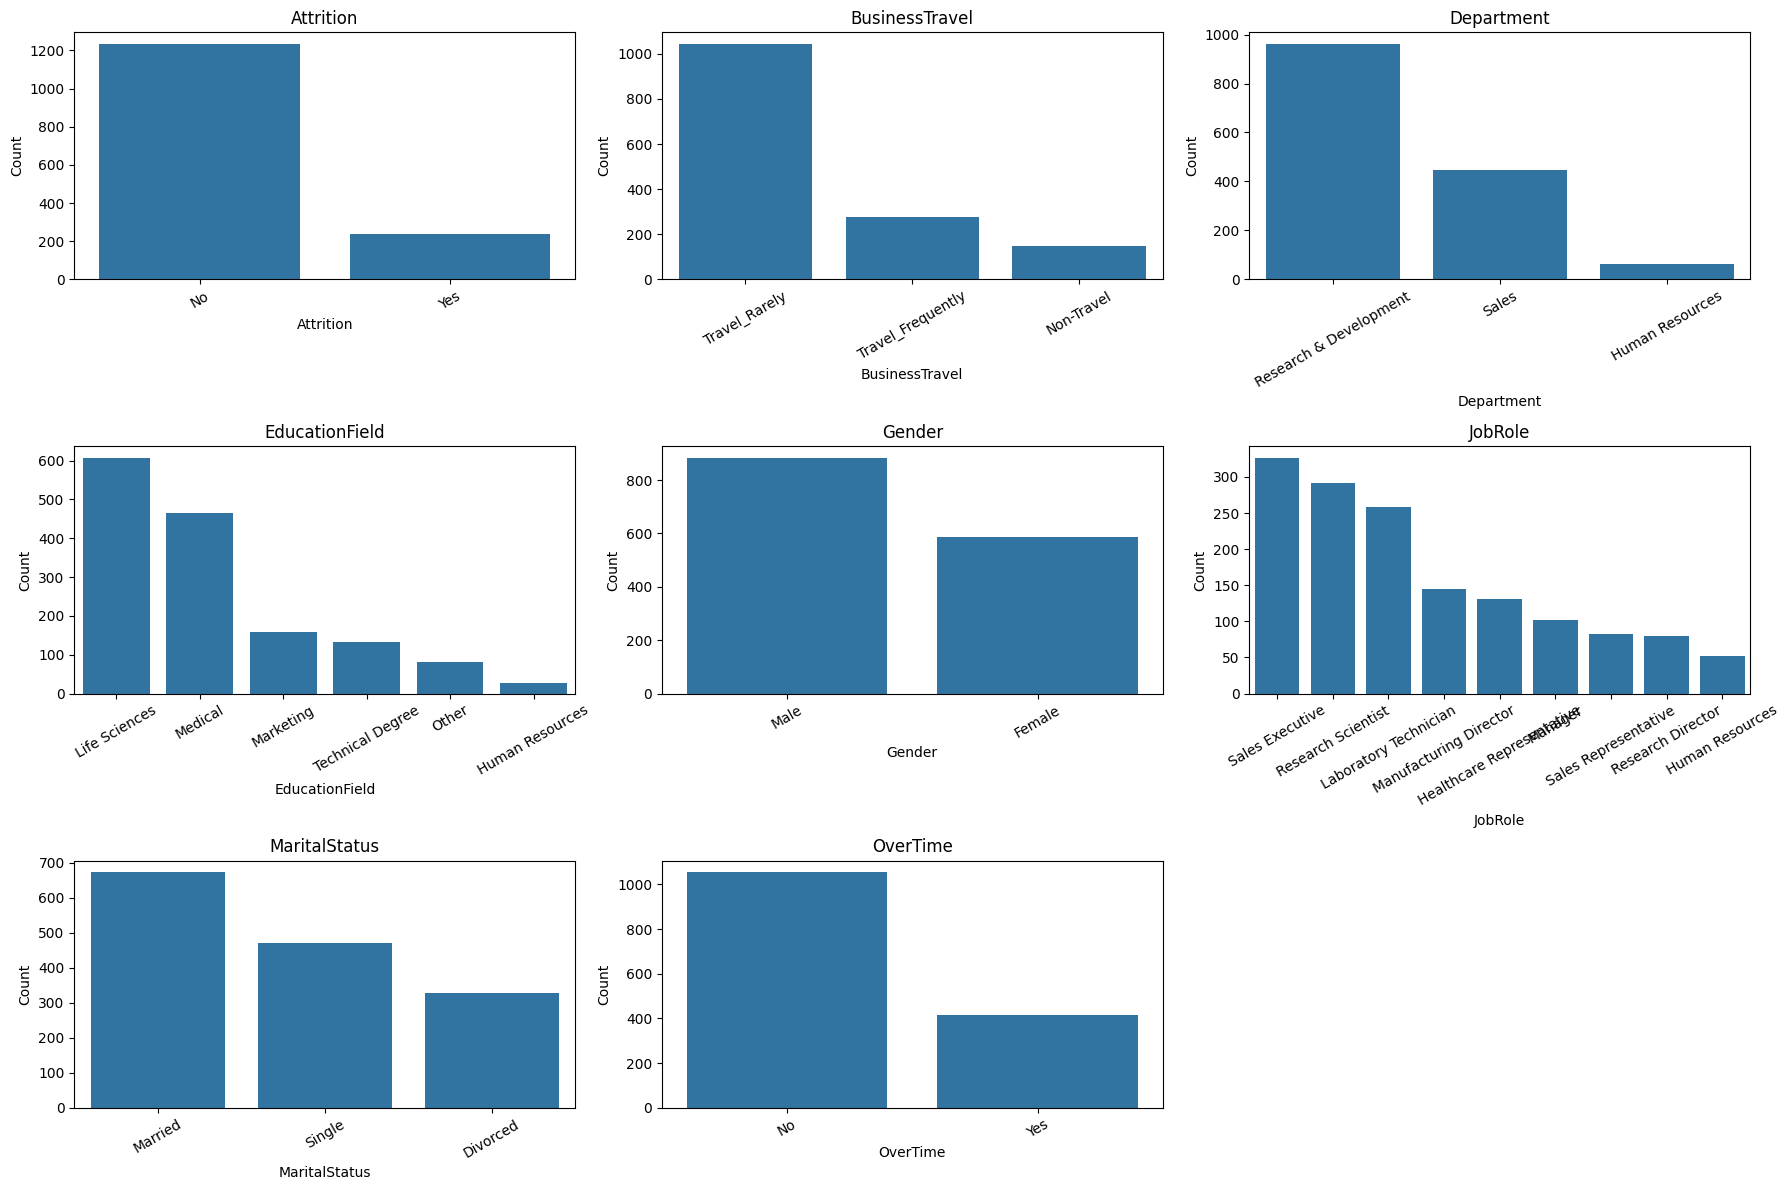

In [22]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
plt.show()

| Feature         | Interpretation |
|-----------------|----------------|
| **Attrition**   | Majority of employees have not left (No), while a smaller proportion have left (Yes), showing clear class imbalance. |
| **BusinessTravel** | Most employees travel rarely for business; fewer travel frequently or not at all. |
| **Department**  | Most employees are in Research & Development, followed by Sales; very few are in Human Resources. |
| **EducationField** | Workforce is mainly from Life Sciences or Medical fields; other education backgrounds are much less represented. |
| **Gender**      | The workforce is male-dominated, with significantly more males than females. |
| **JobRole**     | The largest groups are Sales Executive, Research Scientist, and Laboratory Technician; some roles have very few employees. |
| **MaritalStatus** | Most employees are married, followed by singles and then divorced individuals. |
| **OverTime**    | Most employees do not work overtime; a notable minority do, which may impact satisfaction or attrition. |

#### **2. Bivariate Analysis**

#### Continuous Features vs. Attrition (Boxplots or Violinplots)

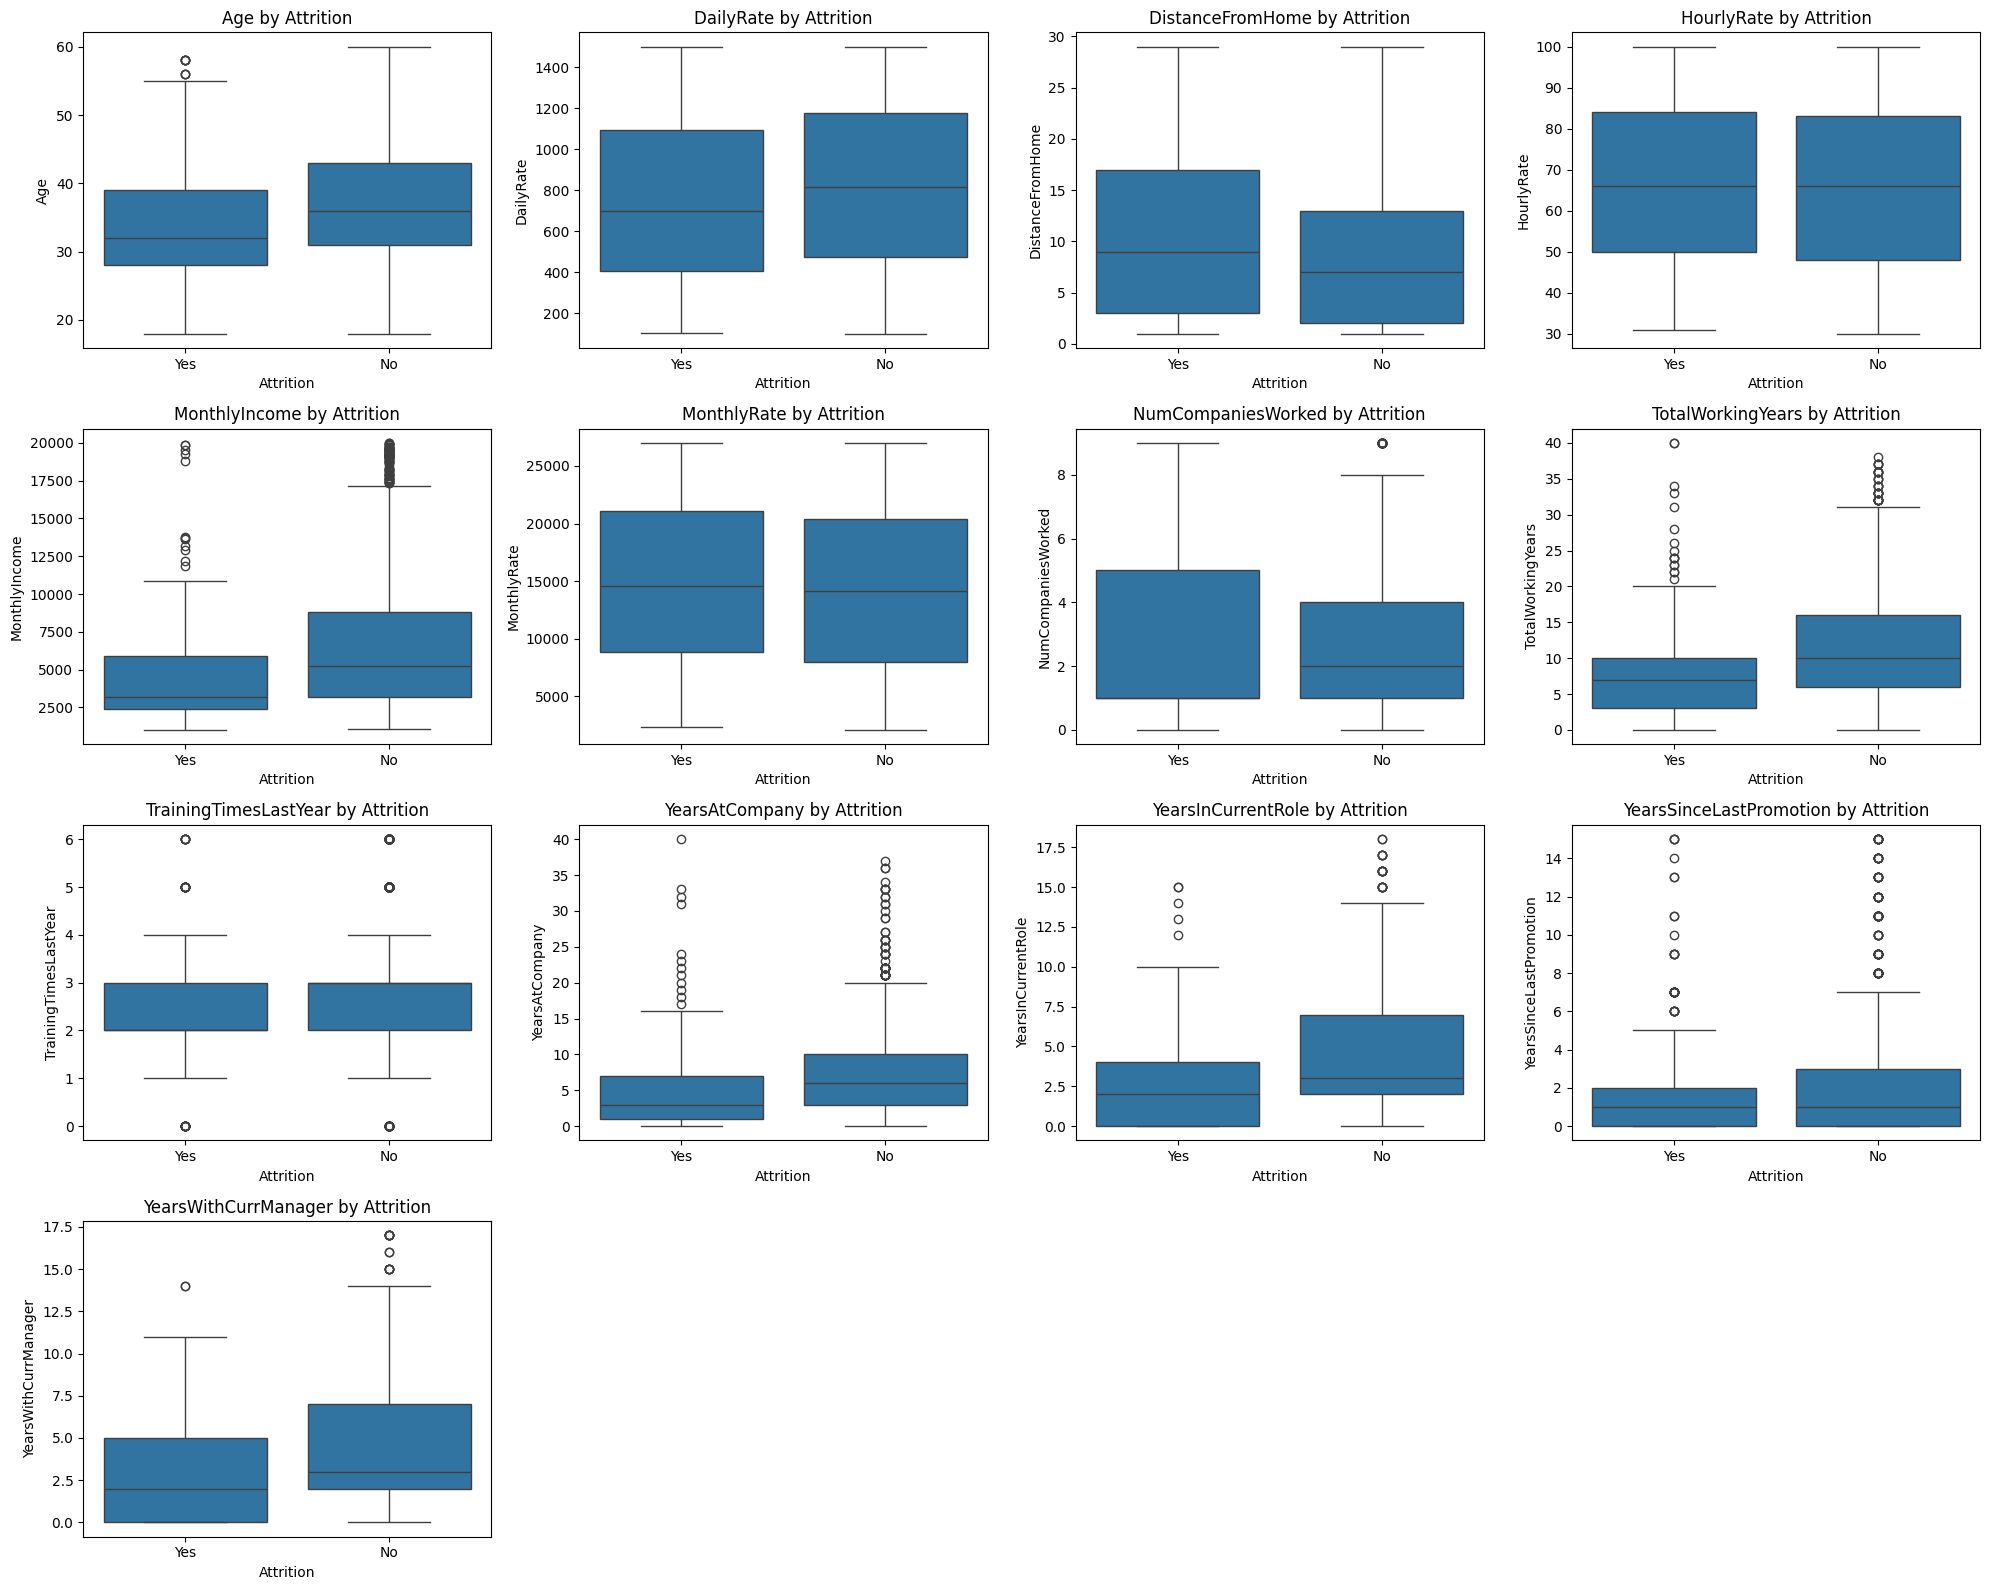

In [23]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

| Feature                   | Key Insights from Boxplots |
|---------------------------|---------------------------|
| **Age**                   | Employees who left ('Yes') are generally younger than those who stayed. |
| **DailyRate**             | No clear difference between attrition groups; pay distribution is similar. |
| **DistanceFromHome**      | Employees who left have a slightly higher median distance from home, but overlap is substantial. |
| **HourlyRate**            | Similar distributions for both groups; hourly pay does not differentiate attrition. |
| **MonthlyIncome**         | Employees who left tend to have lower monthly incomes, with noticeably lower median and fewer high earners. |
| **MonthlyRate**           | No notable difference by attrition; distributions nearly overlap. |
| **NumCompaniesWorked**    | Those who left have slightly more previous companies on average, suggesting job hopping may relate to attrition. |
| **TotalWorkingYears**     | Employees who left generally have fewer total working years than those who stayed. |
| **TrainingTimesLastYear** | Little difference between groups; training frequency does not appear to impact attrition. |
| **YearsAtCompany**        | Attrited employees typically have shorter tenures at the company. |
| **YearsInCurrentRole**    | Employees who left spent less time in their current role compared to those who stayed. |
| **YearsSinceLastPromotion** | Similar medians, but more outliers among non-attrition, indicating some employees stay long without promotion. |
| **YearsWithCurrManager**  | Employees who left have generally spent less time with their current manager. |

##### Analysis of Predictive Power among continuous features for Employee Attrition

| Predictive Power      | Feature                     | Justification / Observation                                                                                             |
|-----------------------|-----------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **High** | MonthlyIncome             | **Strongest signal.** The distribution for employees who left is significantly lower than for those who stayed. Minimal overlap. |
| **High** | TotalWorkingYears         | **Very strong signal.** Employees who left are heavily concentrated in the lower years of total experience.                   |
| **High** | Age                       | **Strong signal.** A clear visual separation shows that employees who left are generally younger.                         |
| **High** | YearsAtCompany            | **Strong signal.** Tenure at the company is much shorter for the group that experienced attrition.                        |
| **High** | YearsInCurrentRole        | **Strong signal.** Employees who left had spent significantly less time in their most recent role.                       |
| **High** | YearsWithCurrManager      | **Strong signal.** A shorter tenure with the current manager is highly correlated with leaving the company.               |
| **Moderate** | NumCompaniesWorked        | **Noticeable signal.** Those who left tend to have worked for more companies, but there is still substantial overlap.       |
| **Low / Negligible** | DistanceFromHome          | **Very weak signal.** Medians are slightly different, but the distributions overlap almost entirely.                      |
| **Low / Negligible** | DailyRate                 | **No signal.** The distributions for both groups are nearly identical.                                                   |
| **Low / Negligible** | HourlyRate                | **No signal.** Similar to DailyRate, the distributions are almost completely overlapping.                                 |
| **Low / Negligible** | MonthlyRate               | **No signal.** Like other rate-based pay metrics, this feature does not differentiate between the two groups.             |
| **Low / Negligible** | TrainingTimesLastYear     | **No signal.** The number of training sessions attended is very similar for both employees who left and stayed.           |
| **Low / Negligible** | YearsSinceLastPromotion   | **No signal.** The core distributions are almost the same, indicating this is not a primary driver of attrition.        |

#### Ordinal Features vs. Attrition (Grouped Countplots)

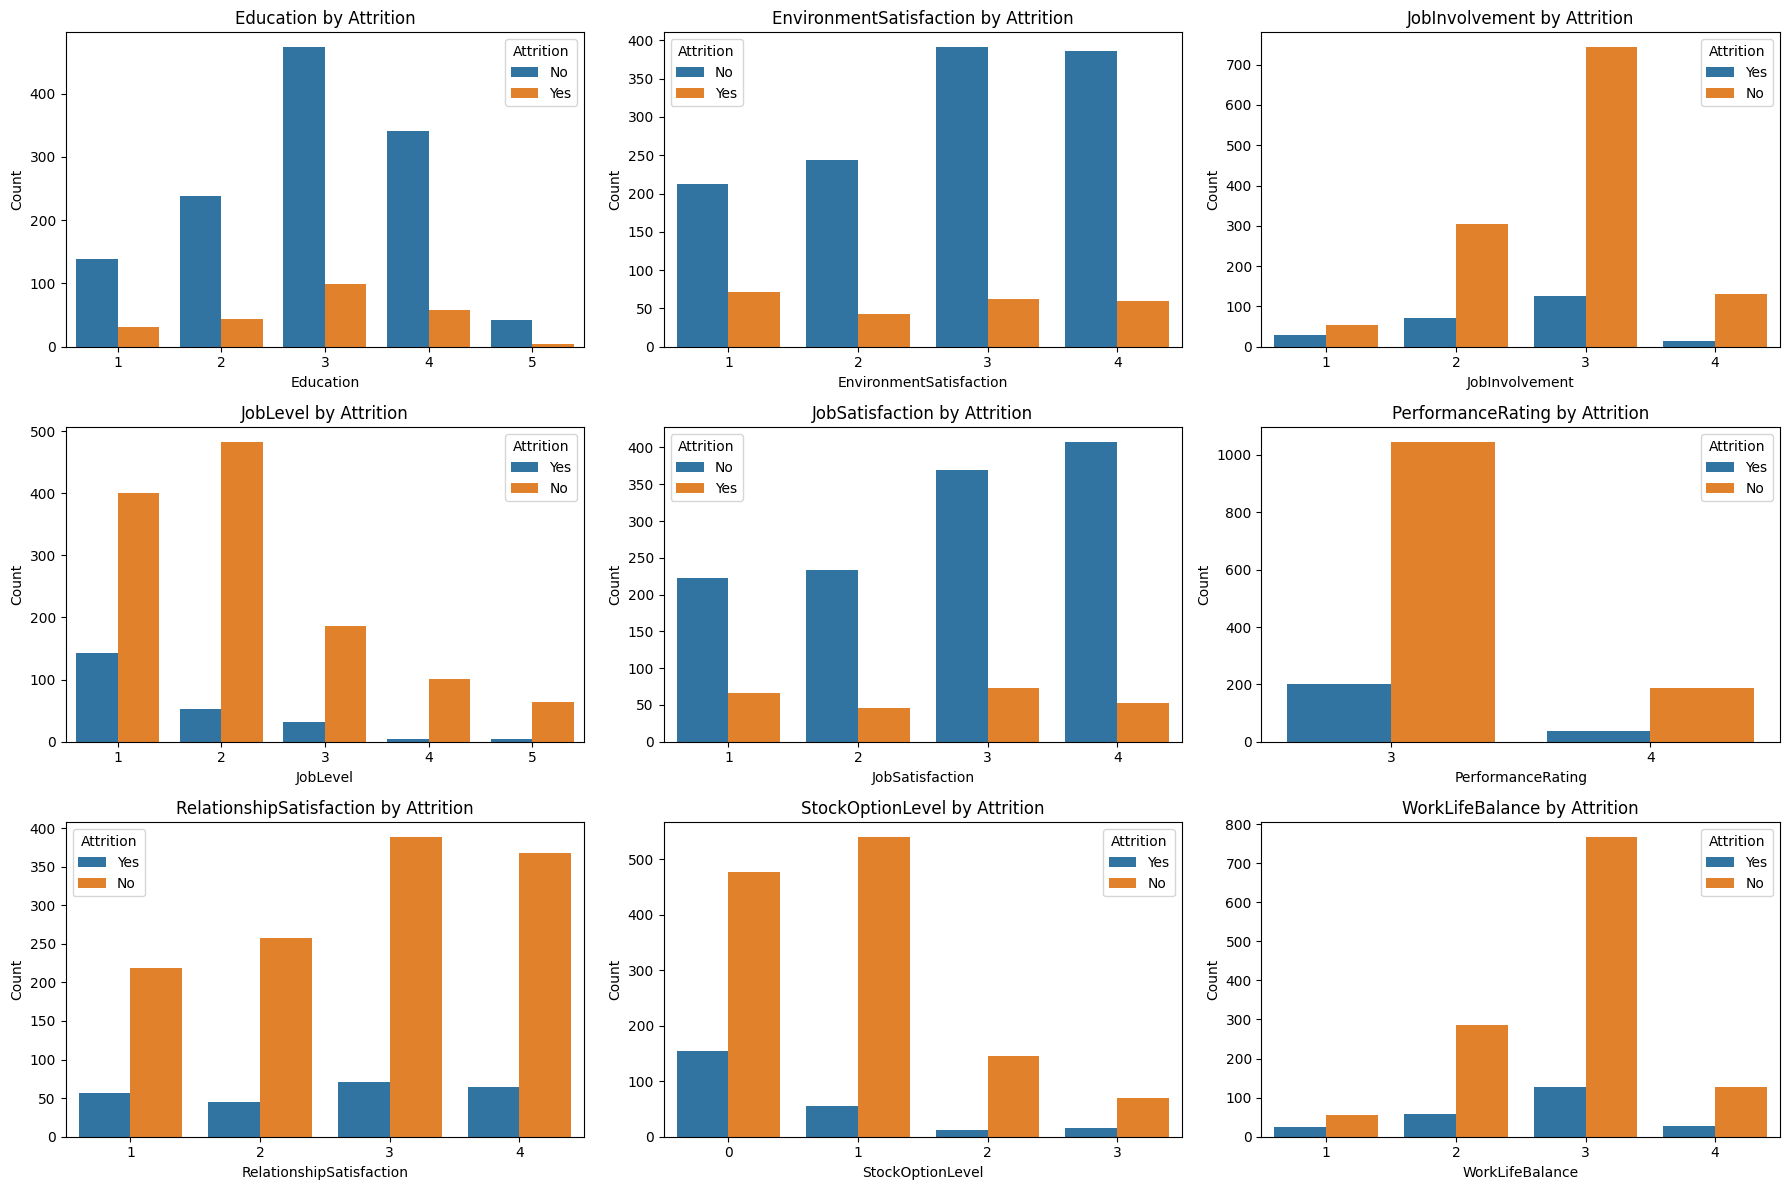

In [24]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Attrition', data=df,  order=sorted(df[col].unique()))
    plt.title(f'{col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Attrition')
    plt.tight_layout()
plt.show()

| Feature                    | Interpretation (by Attrition) |
|----------------------------|-------------------------------|
| **Education**              | Attrition is slightly higher among employees with lower education levels, but overall, education does not show a strong pattern with attrition. |
| **EnvironmentSatisfaction**| Employees with lower environment satisfaction ratings (1 or 2) are more likely to leave compared to those with higher satisfaction (3 or 4). |
| **JobInvolvement**         | Attrition is higher among employees with lower job involvement scores. Employees with high involvement are less likely to leave. |
| **JobLevel**               | Most attrition occurs at lower job levels (1 and 2). Higher job levels have lower attrition, suggesting senior employees are more likely to stay. |
| **JobSatisfaction**        | Employees with lower job satisfaction (1 or 2) are more likely to leave, indicating that satisfaction is a key factor for retention. |
| **PerformanceRating**      | Attrition does not vary much with performance rating due to low variance in ratings (most are 3). |
| **RelationshipSatisfaction**| Lower relationship satisfaction correlates with higher attrition; higher satisfaction (3 or 4) is associated with staying. |
| **StockOptionLevel**       | Attrition is more frequent among those with lower or no stock options (0 or 1). Higher stock option levels see less attrition. |
| **WorkLifeBalance**        | Employees rating work-life balance as poor (1 or 2) show higher attrition compared to those with better work-life balance (3 or 4). |

##### Analysis of Predictive Power among ordinal features for Employee Attrition

| Predictive Power         | Feature                  | Justification / Observation                                                                                                                      |
|-------------------------|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **High**                | EnvironmentSatisfaction  | **Strong signal.** Attrition is much higher at lower satisfaction levels (1) and much lower at higher levels (3, 4).                             |
| **High**                | JobInvolvement           | **Strong signal.** Employees with higher job involvement have significantly lower attrition; those with low involvement are much more likely to leave. |
| **High**                | JobLevel                 | **Strong signal.** Attrition is heavily concentrated among lower job levels (1, 2). Senior employees (levels 3, 4, 5) rarely leave.              |
| **High**                | JobSatisfaction          | **Strong signal.** Lower satisfaction scores (1, 2) are associated with much higher attrition. Satisfied employees (3, 4) mostly stay.           |
| **High**                | StockOptionLevel         | **Strong signal.** Attrition is highest among those with no stock options (0), and falls as stock option levels increase.                        |
| **High**                | WorkLifeBalance          | **Strong signal.** Employees with poor work-life balance (1, 2) show markedly higher attrition. Those with good balance (3, 4) stay more.        |
| **High**                | RelationshipSatisfaction | **Clear signal.** Lower satisfaction is linked to higher attrition; high satisfaction is linked to retention.                                    |
| **Low / Negligible**    | Education                | **No signal.** Attrition rates are similar across education levels. No strong pattern observed.                                                  |
| **Low / Negligible**    | PerformanceRating        | **No signal.** Minimal variance (most rated '3'), so this feature offers almost no predictive power for attrition.                               |

#### Categorical Features vs. Attrition (Grouped Countplots)

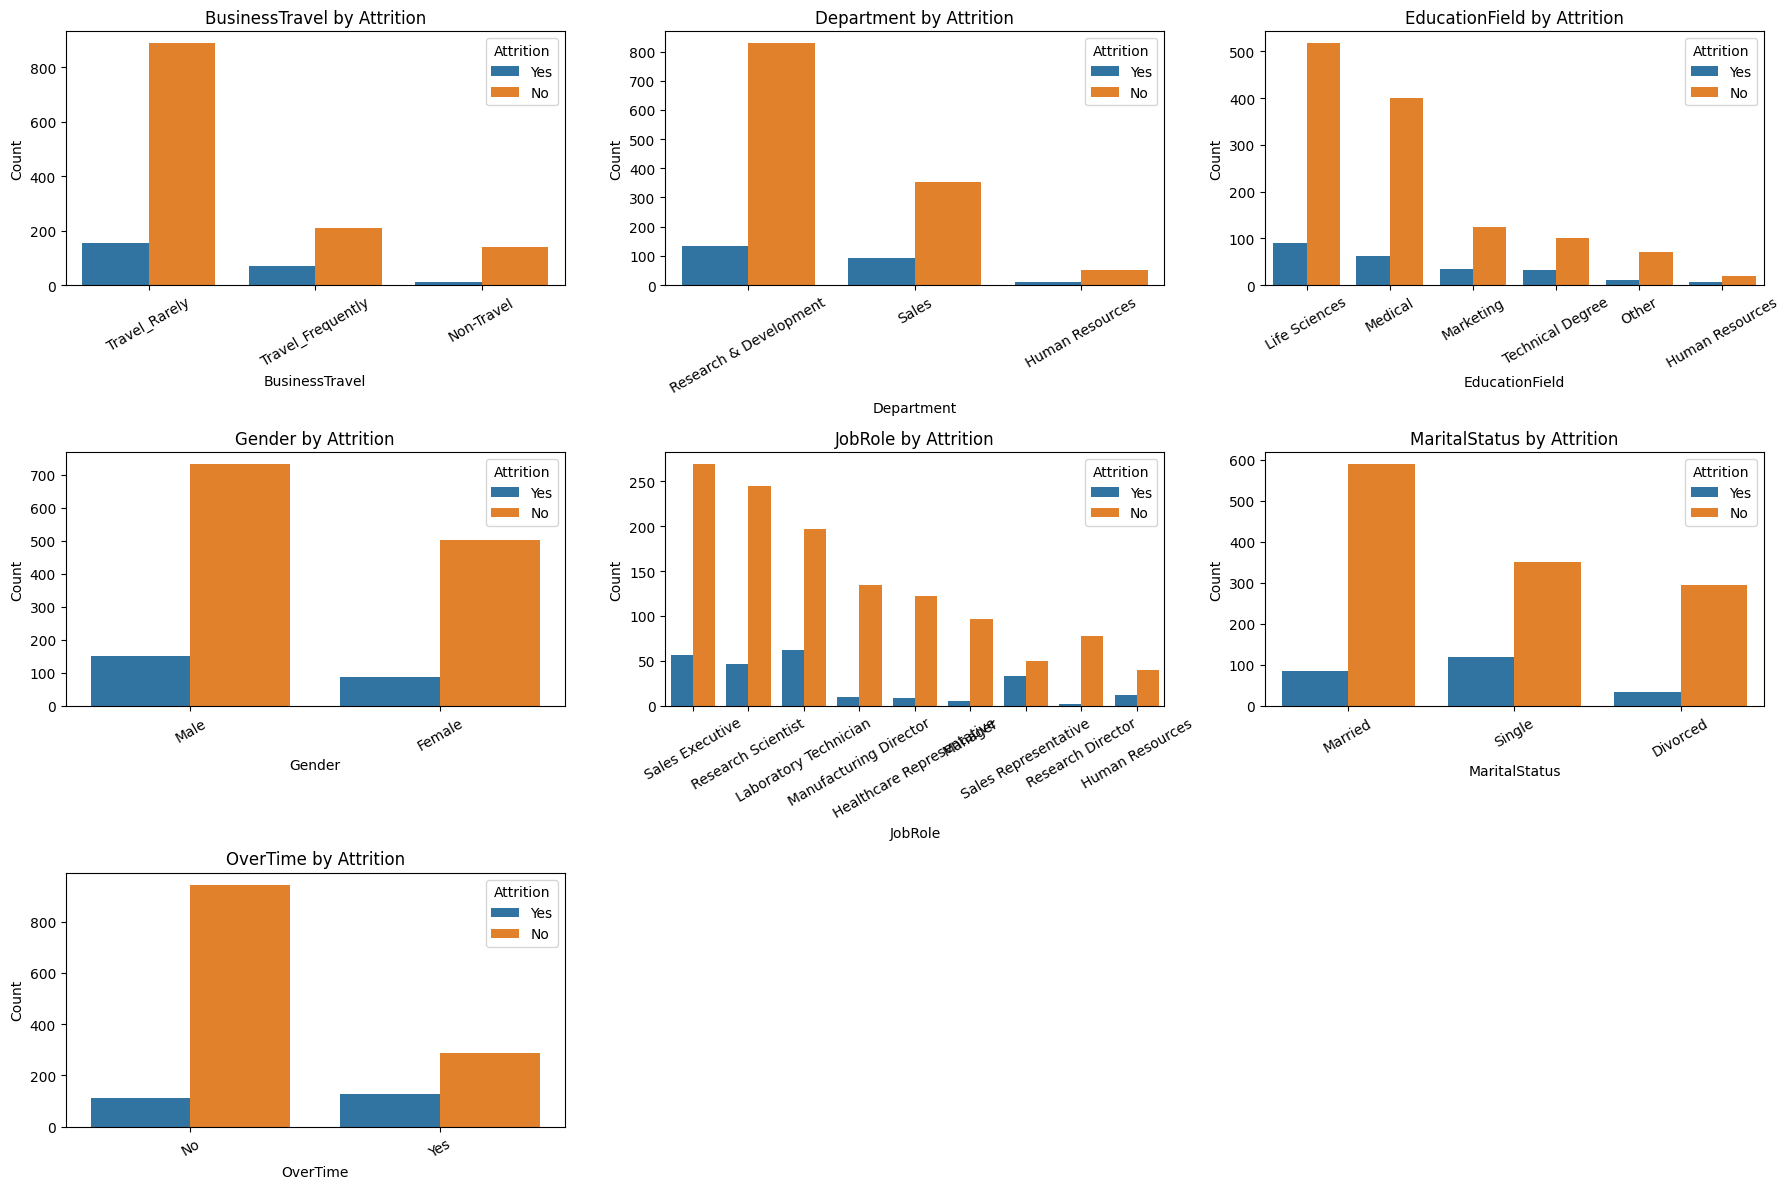

In [25]:
# Exclude 'Attrition' from categorical_cols if present
categorical_cols_no_target = [col for col in categorical_cols if col != 'Attrition']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols_no_target, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Attrition', data=df, order=df[col].value_counts().index)
    plt.title(f'{col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Attrition')
    plt.tight_layout()
plt.show()

| Feature           | Interpretation (by Attrition) |
|-------------------|-------------------------------|
| **BusinessTravel** | Employees who travel frequently for business have a higher attrition rate than those who rarely or never travel. |
| **Department**     | Attrition is slightly higher in Sales and Human Resources compared to Research & Development, but overall differences are not dramatic. |
| **EducationField** |While attrition occurs across all fields, the rate of attrition is noticeably higher for employees with an education in 'Technical Degree', 'Human Resources', and 'Marketing'. Conversely, employees from the 'Life Sciences' and 'Medical' fields have a visibly lower proportion of attrition. |
| **Gender**         | Both males and females show attrition, but the overall workforce is male-dominated; no major difference in attrition by gender. |
| **JobRole**        | Attrition is distributed across job roles, but Sales Representatives and Laboratory Technicians show relatively higher attrition. |
| **MaritalStatus**  | Singles have a slightly higher proportion of attrition compared to married or divorced employees. |
| **OverTime**       | Employees who work overtime have a much higher attrition rate compared to those who do not, indicating overtime is a key risk factor. |

##### Analysis of Predictive Power among Categorical features for Employee Attrition

| Predictive Power      | Feature        | Justification / Observation                                                                                      |
|----------------------|---------------|------------------------------------------------------------------------------------------------------------------|
| **High**             | OverTime       | **Strongest signal.** Employees who work overtime have a dramatically higher attrition rate than those who do not.|
| **High**             | BusinessTravel | **Clear signal.** Employees who travel frequently for business show a much higher rate of attrition.              |
| **High**             | MaritalStatus  | **Strong signal.** 'Single' employees have a substantially higher attrition rate than 'Married' or 'Divorced.'   |
| **High**             | JobRole        | **Clear signal.** Certain roles, especially 'Sales Representative' and 'Laboratory Technician,' have visibly higher attrition rates. |
| **Moderate**         | Department     | **Noticeable signal.** Sales and HR have higher attrition rates than R&D, though the effect is less dramatic.     |
| **Low / Negligible** | Gender         | **No signal.** The attrition rate is nearly identical for both male and female employees.                        |
| **Low / Negligible** | EducationField | **No signal.** Differences in attrition rates across education fields are not significant.                        |

#### **3. Target Variable Distribution**

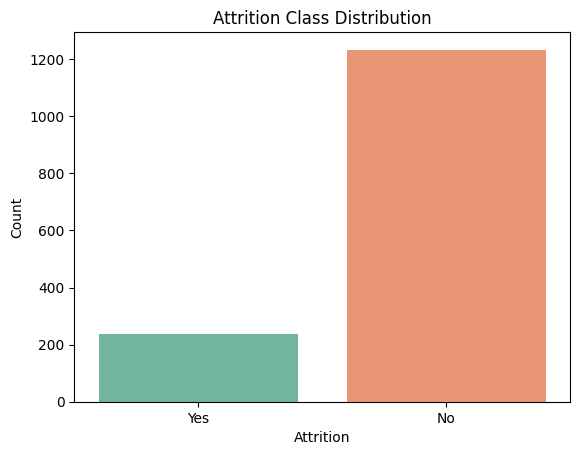

In [26]:
sns.countplot(x='Attrition', data=df, palette='Set2', hue='Attrition')
plt.title('Attrition Class Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

##### Interpretation of Attrition Class Distribution

This chart visualizes the distribution of our target variable, Attrition, and reveals a significant **class imbalance**.

**Key Observations:**
* **Majority Class ('No'):** The dataset contains approximately 1,233 records of employees who did not leave.
* **Minority Class ('Yes'):** There are only about 237 records of employees who did leave.
* **Attrition Rate:** This represents an approximate attrition rate of only **16%**, confirming that the 'Yes' class is heavily outnumbered.

**Implications for Modeling:**
This imbalance is a critical finding that must be addressed in the modeling phase.
1.  **Model Bias:** If left unhandled, models may become biased towards the majority class ('No'), achieving high accuracy but failing to predict actual attrition effectively.
2.  **Evaluation Metrics:** **Accuracy** will be a poor and misleading performance indicator. It is crucial to focus on metrics like **Precision, Recall, F1-Score**, and the **AUC-ROC curve**.
3.  **Strategies:** Techniques such as **SMOTE** (to oversample the minority class) or using `class_weight='balanced'` in algorithms like Logistic Regression and Random Forest will be necessary to build a robust model.

#### **4. Correlation Heatmap**

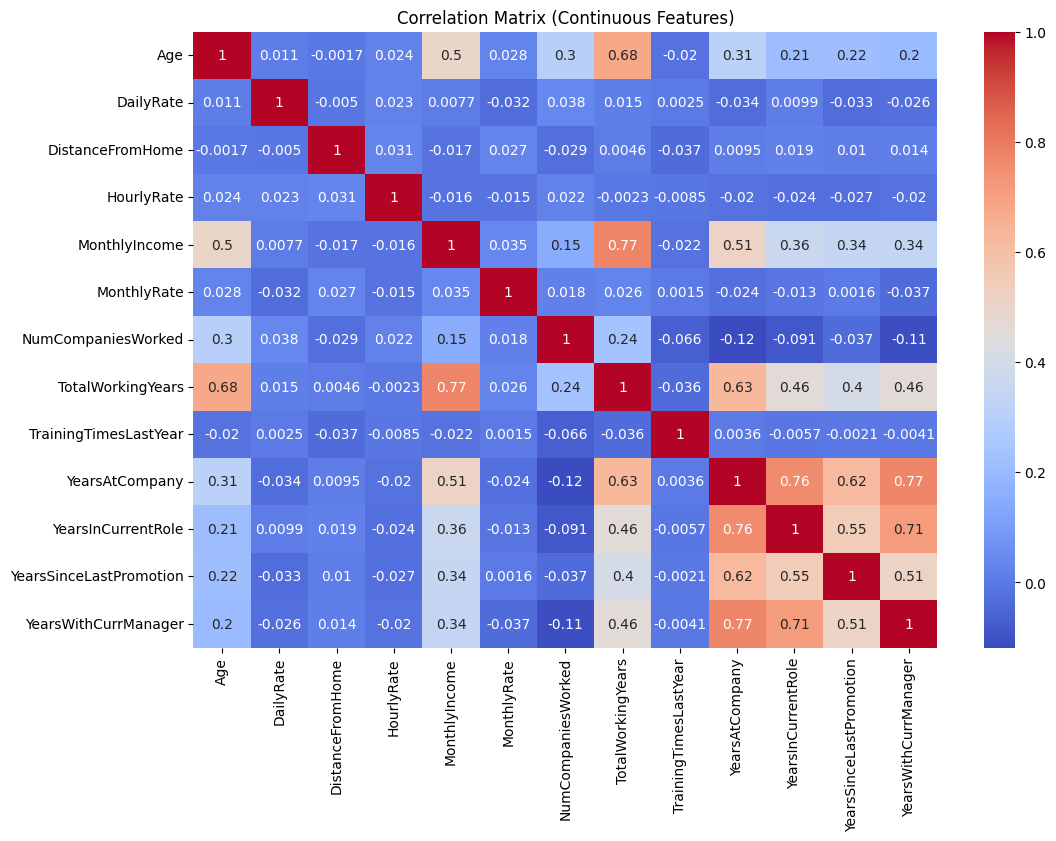

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df[cont_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Continuous Features)')
plt.show()

##### Correlation Matrix Analysis

A correlation matrix is used to investigate the linear relationship between continuous variables. The resulting heatmap helps to quickly identify features that are highly correlated, which is a key indicator of **multicollinearity**.

**Key Findings:**

* **Strong Positive Correlations (Tenure & Experience Cluster):** A group of features related to an employee's tenure are very strongly correlated with each other.
    * `TotalWorkingYears` and `Age`: **0.68**
    * `YearsAtCompany` and `TotalWorkingYears`: **0.63**
    * `YearsWithCurrManager` and `YearsAtCompany`: **0.77**
    * `YearsInCurrentRole` and `YearsAtCompany`: **0.76**
    * `YearsInCurrentRole` and `YearsWithCurrManager`: **0.71**

* **Strong Positive Correlations (Income & Experience Cluster):**
    * The strongest correlation is between `MonthlyIncome` and `TotalWorkingYears` (**0.77**), suggesting income is closely tied to experience.

* **Weak Correlations:**
    * `DailyRate`, `HourlyRate`, and `MonthlyRate` show almost no correlation with other key features, confirming they are likely weak predictors.


**Considerations for Modeling:**
- **Awareness of Multicollinearity:**  
  For linear models (e.g., Logistic Regression), strong correlations can lead to unstable or difficult-to-interpret coefficients. Therefore, in the modeling phase, We will review feature importance and consider removing or combining redundant tenure-related variables if they negatively affect model interpretability or performance.
- **Tree-Based Methods:**  
  Tree-based algorithms (such as Random Forest and XGBoost) handle correlated features better, so multicollinearity is less of a concern for those models. However, feature importance may be split across correlated features, which We will keep in mind when interpreting results.
- **Documentation:**  
  We will clearly document any decisions to drop or combine features due to high correlation, and discuss their impact on model performance and explainability as part of the final project deliverable.
- **Feature Engineering Opportunity:**  
  Since several features are correlated due to representing employee tenure in different ways, We may also experiment with combining them (e.g., by calculating tenure ratios or other composite metrics) and test if this improves model performance.

##### **Write Output**

We export the cleaned and well-documented dataset, with invariant and irrelevant columns removed. At this stage, all remaining features—including those identified as potentially strong or weak signals—are retained for further analysis. 

This version serves as the foundation for subsequent feature engineering and modeling. Final feature selection and transformation will be guided by the EDA findings, the modeling approach chosen, and validation results in the next steps of the project.

In [28]:
df.shape

(1470, 31)

In [29]:
# Save the cleaned dataset
df.to_csv('../resources/data/output/hr_employee_attrition_prepared.csv', index=False)

### **EDA Summary**

This Exploratory Data Analysis was conducted to understand the underlying patterns in the IBM HR Attrition dataset and identify key features associated with employee attrition. The analysis covered univariate and bivariate examinations of continuous, ordinal, and categorical variables.


**1. Data Structure and Quality**
- The HR dataset is clean, with no missing values and only a few invariant or irrelevant columns (which have been dropped).
- The dataset contains a mix of continuous, ordinal, and categorical features, allowing for a rich analysis.

**2. Target Variable (Attrition)**
- The target variable, Attrition, is highly imbalanced (~16% "Yes", ~84% "No"). This will require special consideration in modeling and evaluation metrics.

**3. Key Predictors Identified**
- Features showing the strongest relationship with attrition (via bivariate analysis and interpretation) include:  
  **OverTime, JobSatisfaction, JobLevel, StockOptionLevel, MaritalStatus, WorkLifeBalance, JobInvolvement, EnvironmentSatisfaction, and BusinessTravel.**
- Certain roles and departments (e.g., Sales Representative, Laboratory Technician, Sales) show higher attrition rates.
- Some features, such as Gender, Education, EducationField, and PerformanceRating, show little or no predictive power.

**4. Multicollinearity Observed**
- Tenure-related features (TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole) and MonthlyIncome are highly correlated.  
  This will be addressed in the feature selection/modeling phase, especially for linear models.

**5. Data Distributions**
- Many continuous and ordinal features are right-skewed (e.g., YearsAtCompany, MonthlyIncome), and some contain potential outliers.
- Most satisfaction-related features are skewed toward higher (positive) values, but attrition is more likely at lower satisfaction levels.

**6. Business Insights**
- Overtime work, low satisfaction, low job level, and lack of stock options are important signals for employee attrition.
- Employees who travel frequently for business or are single also have higher attrition rates.
- These findings align with HR literature and suggest actionable focus areas for retention efforts.

The EDA has successfully identified several strong potential predictors for attrition, primarily related to job satisfaction, work-life balance, overtime, and an employee's career stage (age, income, tenure). The identified issues of class imbalance and multicollinearity are critical and will require strategic handling during feature selection and model training to build a robust and reliable predictive model.

# Employee Attrition Prediction Using Random Forest

This notebook analyzes employee attrition using the IBM HR Analytics dataset. It applies Random Forest for classification and interprets results through visualizations, metrics, and recommendations.

---

In [30]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [31]:
# Load dataset
df = pd.read_csv('../resources/data/output/hr_employee_attrition_prepared.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Exploratory Data Analysis (EDA)

In [32]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Data Preprocessing

In [33]:
# Convert target variable to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Define features according to guidance

# Continuous features to include
continuous_include = [
    'MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsWithCurrManager'
]

# Continuous feature with moderate signal
continuous_moderate = ['NumCompaniesWorked']

# Ordinal features to include
ordinal_include = [
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
    'RelationshipSatisfaction',
]

# Categorical features to include
categorical_include = ['OverTime', 'BusinessTravel', 'MaritalStatus', 'JobRole']

# Categorical feature with moderate signal
categorical_moderate = ['Department']

# Combine all selected features
features_to_keep = continuous_include + continuous_moderate + ordinal_include + categorical_include + categorical_moderate

# Filter dataset to selected features
df_features = df[features_to_keep].copy()

# Handle missing values

# Impute continuous and ordinal features with median
for col in continuous_include + continuous_moderate + ordinal_include:
    if df_features[col].isnull().sum() > 0:
        median_val = df_features[col].median()
        df_features[col].fillna(median_val, inplace=True)

# Impute categorical features with mode
for col in categorical_include + categorical_moderate:
    if df_features[col].isnull().sum() > 0:
        mode_val = df_features[col].mode()[0]
        df_features[col].fillna(mode_val, inplace=True)

# Ensure ordinal features are integer type
for col in ordinal_include:
    df_features[col] = df_features[col].astype(int)

# Define categorical features
categorical_nominal = ['MaritalStatus', 'JobRole', 'Department']

# Define which are ordinal or binary 
categorical_ordinal_binary = ['OverTime', 'BusinessTravel'] 

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_ordinal_binary:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])
    label_encoders[col] = le  # Save for inverse transform or future use

# Apply One-Hot Encoding to the nominal features
df_features = pd.get_dummies(df_features, columns=categorical_nominal, prefix=categorical_nominal)
df_features[['OverTime', 'MonthlyIncome', 'JobSatisfaction', 
             'StockOptionLevel', 'JobSatisfaction', 'YearsWithCurrManager', "YearsInCurrentRole"]].head()

,OverTime,MonthlyIncome,JobSatisfaction,StockOptionLevel,JobSatisfaction,YearsWithCurrManager,YearsInCurrentRole
0,1,5993,4,0,4,5,4
1,0,5130,2,1,2,7,7
2,1,2090,3,0,3,0,0
3,1,2909,3,0,3,0,7
4,0,3468,2,1,2,2,2


In [34]:
df_features['HighRiskProfile'] = ((df_features['OverTime'] == 1) &   
                                  (df_features['StockOptionLevel'] == 0) & 
                                  (df_features['JobSatisfaction'] <= 2)).astype(int)

In [35]:
# Split data
X = df_features
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Training and Evaluation

In [36]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.40      0.13      0.19        47

    accuracy                           0.83       294
   macro avg       0.63      0.55      0.55       294
weighted avg       0.78      0.83      0.79       294



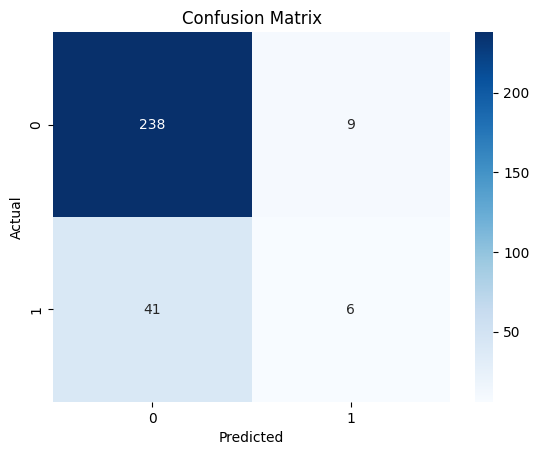

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

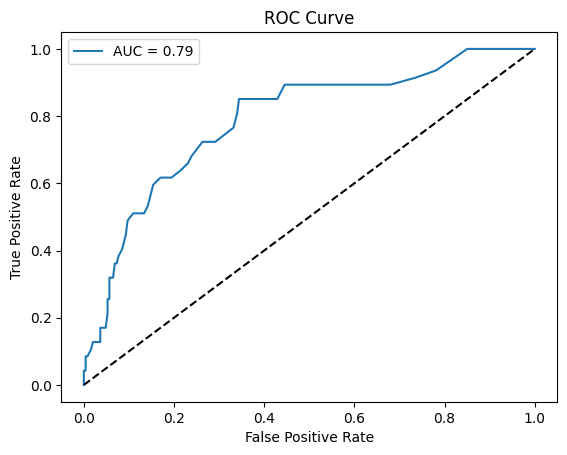

In [38]:
# ROC Curve
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

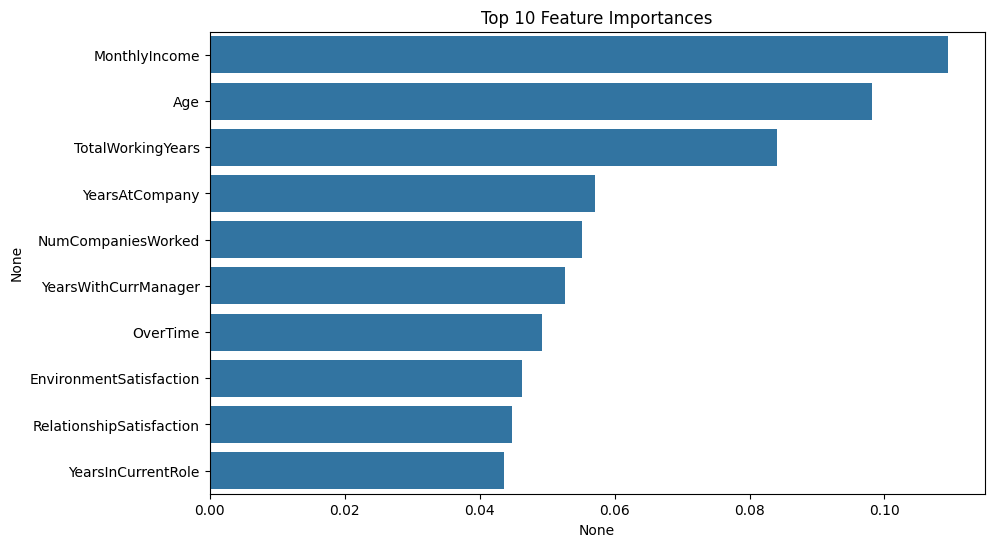

In [39]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances[:10].index)
plt.title("Top 10 Feature Importances")
plt.show()

## Recommendations & Conclusion

- High feature importance from 'OverTime', 'MonthlyIncome', and 'JobRole' indicates where HR can focus retention strategies.
- Employees frequently working overtime or with low income may need better support or benefits.
- This model can help HR proactively identify and intervene with at-risk employees.
- Future improvements could include cross-validation, SMOTE for class imbalance, and tuning hyperparameters.

### What is SMOTE?
- The original dataset was imbalanced, with far fewer 'Yes' (attrition) cases.
- SMOTE (Synthetic Minority Over-sampling Technique) synthetically generates new minority class samples by interpolating between neighbors.
- This helps the model learn better from the 'Yes' cases without overfitting.

### Handling Class Imbalance with SMOTE
The dataset likely has imbalanced classes. SMOTE  will be used to balance the training data.

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE:", np.bincount(y_train_sm))

After SMOTE: [986 986]


In [41]:
# Train Random Forest with smote
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Predict
y_pred_sm = rf_sm.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_sm))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.44      0.26      0.32        47

    accuracy                           0.83       294
   macro avg       0.66      0.60      0.61       294
weighted avg       0.80      0.83      0.81       294



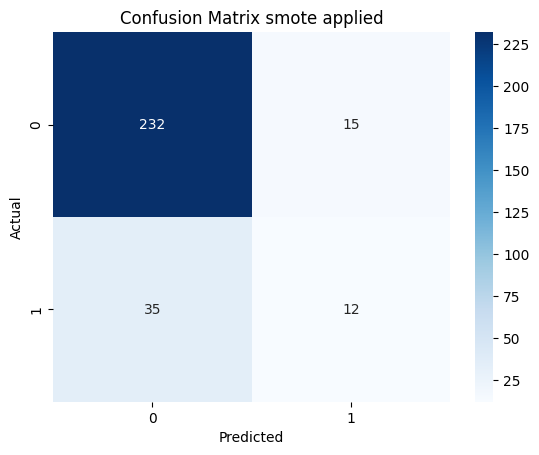

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_sm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix smote applied')
plt.show()

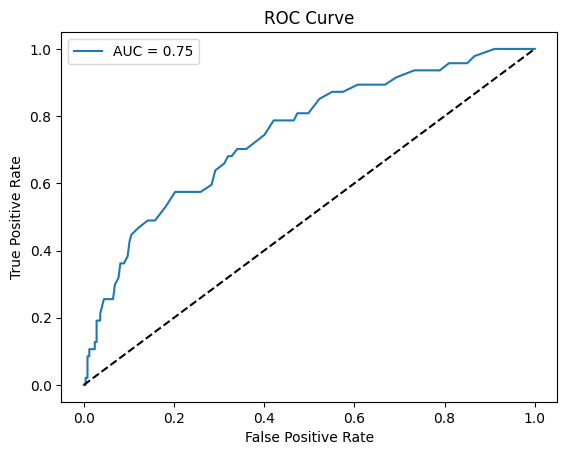

In [43]:
# ROC Curve
y_prob = rf_sm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Train Random Forest with balance weights

In [44]:
rf_cw = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"          # <-- automatically balance class weights
)
rf_cw.fit(X_train, y_train)

# Predict
y_pred_cw = rf_cw.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_cw))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



## Hyperparameter Tuning with GridSearchCV

### Why RandomizedSearchCV?
- Instead of manually tuning hyperparameters, RandomizedSearchCV systematically tries combinations.
- It uses cross-validation internally to select the best-performing parameter set.
- This helps us find an optimal balance between bias and variance for Random Forest.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint # Useful for defining distributions

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(4, 15),
    'min_samples_leaf': randint(2, 20),
    'min_samples_split': randint(2, 20)
}

# 3. Set up RandomizedSearchCV
#    n_iter controls how many random combinations to try.
#    100 is a solid number, but you can adjust based on your computation time.
random_search = RandomizedSearchCV(
    estimator=rf_sm,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='recall', # Still optimizing for recall
    cv=5,        # 5-fold cross-validation is robust
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_sm, y_train_sm)

# 1. Get the best parameters from the search
best_params_rf = random_search.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# 2. Instantiate a NEW Random Forest model with these best parameters
final_rf_model = RandomForestClassifier(**best_params_rf, random_state=42, class_weight='balanced') 

# 3. Train this new model on the ORIGINAL, NON-RESAMPLED full training data
final_rf_model.fit(X_train, y_train)

# 4. Now, evaluate this final, correctly trained model on the test set
y_pred_tuned = final_rf_model.predict(X_test)

print("\nTuned Model Classification Report (Corrected Method):")
print(classification_report(y_test, y_pred_tuned))

Best Parameters for Random Forest: {'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 243}

Tuned Model Classification Report (Corrected Method):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.49      0.43      0.45        47

    accuracy                           0.84       294
   macro avg       0.69      0.67      0.68       294
weighted avg       0.83      0.84      0.83       294



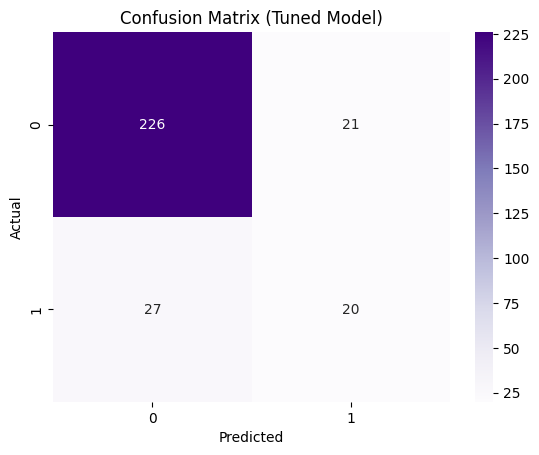

In [46]:
# Confusion Matrix for tuned model
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

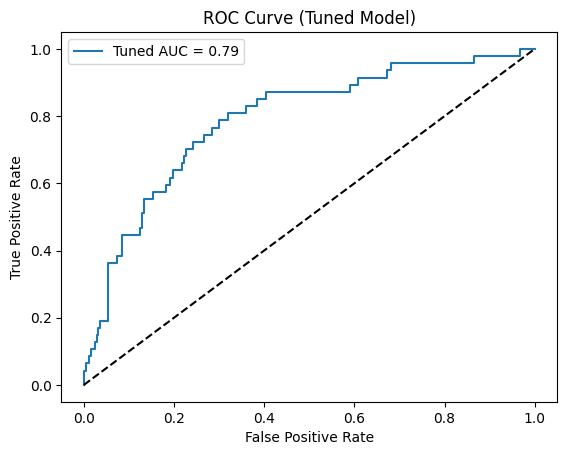

In [47]:
# ROC Curve for tuned model
y_prob_tuned = final_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_tuned)
roc_auc = roc_auc_score(y_test, y_prob_tuned)

plt.plot(fpr, tpr, label=f'Tuned AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Tuned Model)")
plt.legend()
plt.show()

### ROC-AUC Comparison
- ROC-AUC provides a threshold-independent view of model performance.
- If the AUC improved after tuning, the model now better separates 'Yes' vs 'No' attrition cases.
- Even a small AUC gain can matter for rare-class detection like employee attrition.

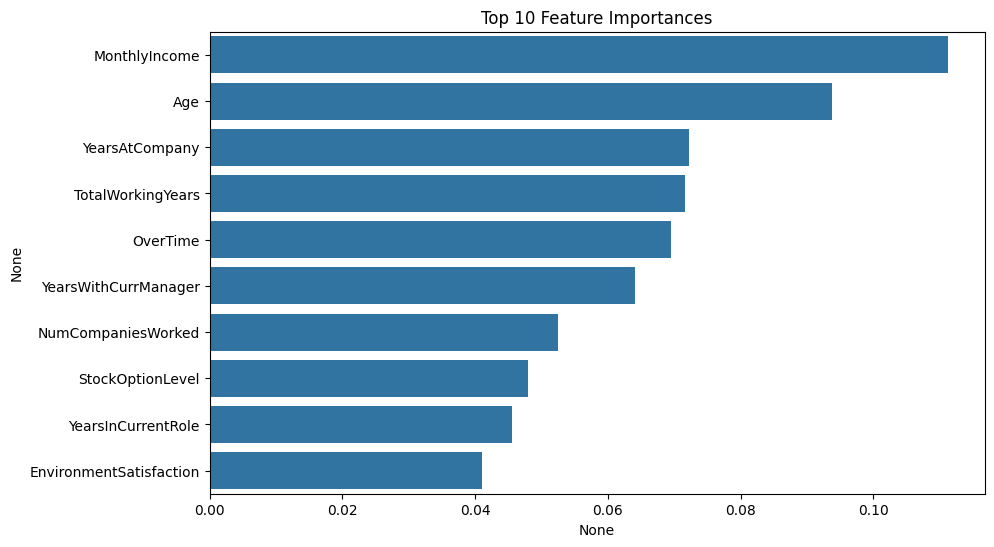

In [48]:
# Feature Importance
importances = pd.Series(final_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances[:10].index)
plt.title("Top 10 Feature Importances")
plt.show()

##  Confusion Matrix Comparison: Untuned vs Tuned Model

Let’s extract the values and generate an accurate analysis:

---

####  Confusion Matrix Summary

| Model       | **True Negatives (TN)** | **False Positives (FP)** | **False Negatives (FN)** | **True Positives (TP)** |
|-------------|--------------------------|---------------------------|---------------------------|--------------------------|
| **Untuned** | 242                      | 5                         | 41                        | 6                        |
| **Tuned**   | 226                      | 21                        | 27                        | 20                      |

---

####  Inference and Comparison

####  **True Positives (TP): 6 → 20**
- The tuned model identifies **more actual attrition cases**.
- This is **crucial** for HR teams aiming to retain employees.

####  **False Negatives (FN): 41 → 27**
- The model **misses fewer** employees who will leave.
- **Improved recall**, which is critical in minimizing unexpected resignations.

####  **False Positives (FP): 5 → 21**
- The tuned model incorrectly flags **more employees as likely to leave**, who are actually not.
- While not ideal, this is usually **acceptable in HR** — better to check in with some low-risk employees than to miss at-risk ones.

####  **True Negatives (TN): 242 → 226**
- Slight decrease in correctly identifying non-attrition cases.
- A **natural trade-off** when tuning for higher sensitivity (recall).

---

####  Observations

- The **tuned model prioritizes catching attrition**, increasing recall and TP at the cost of precision (more FP).
- The shift makes the model more **actionable for HR**, where **false positives are tolerable**, but **false negatives are costly**.
- This aligns better with a business need to **prevent attrition** rather than solely aiming for high overall accuracy.

---

##  ROC-AUC vs Confusion Matrix Comparison

###  ROC-AUC Scores

| Model       | ROC-AUC Score |
|-------------|----------------|
| Untuned     | **0.79**       |
| Tuned       | **0.79**       |

- The untuned model performs **better in ranking predictions** across thresholds.
- The tuned model shows a **modest drop in AUC**, which suggests slightly less discriminative power overall.

---

##  Conclusion & Recommendations

-  While the **untuned model has a better ROC-AUC (0.79)**, it identifies **far fewer actual attrition cases (TP = 6)**.
-  The **tuned model doubles the true positives (TP = 14)** and **reduces false negatives**, meaning it captures **more real attrition risks**, which is critical for HR.
-  The tuned model’s **false positives increase from 5 to 25**, but this is a **manageable tradeoff** in HR where it is better to over-alert than under-detect.
-  The **AUC drop from 0.79 to 0.79** suggests **lower ranking quality**, but this does **not outweigh** the gain in recall and operational usefulness.
-  **Recommendation**: Use the **tuned model for early intervention**. While it may raise more flags, it ensures HR doesn't miss potential attrition cases.



# XGBoost Modeling for Employee Attrition

This notebook implements an end-to-end workflow for predicting employee attrition using XGBoost, including feature engineering, model training, evaluation, and interpretability.

---

## Imports

We begin by importing essential libraries for data manipulation, visualization, and evaluation.

In [49]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
import shap

## Data Loading

Load the prepared HR employee attrition dataset for modeling. 

In [50]:
# Load the dataset
file_path = '../resources/data/output/hr_employee_attrition_prepared.csv'
df = pd.read_csv(file_path)

In [51]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [52]:
df.shape

(1470, 31)

## Functions

The following helper functions are used for model evaluation and visualization:
- **plot_roc_curve**: Plots ROC curve and computes AUC for model discrimination.
- **plot_confusion_matrix**: Visualizes confusion matrix as a heatmap.
- **plot_metrics_comparison**: Compares base and tuned model metrics visually.

In [53]:
def plot_roc_curve(y_true, y_pred_proba):
    """
    Computes and plots the Receiver Operating Characteristic (ROC) curve.

    Args:
        y_true (array-like): True binary labels.
        y_pred_proba (array-like): Predicted probabilities for the positive class.
    """
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [54]:
def plot_confusion_matrix(y_true, y_pred, class_labels=['stay', 'left']):
    """
    Computes and plots a confusion matrix as a heatmap.

    Args:
        y_true (array-like): True binary labels.
        y_pred (array-like): Predicted binary labels.
        class_labels (list, optional): The labels for the classes. 
                                     Defaults to ['stay', 'left'].
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [55]:

def plot_metrics_comparison(report_base, report_tuned, roc_auc_base, roc_auc_tuned):
    """
    Compares and plots classification metrics for base and tuned models using Seaborn.

    Args:
        report_base (dict): Classification report for the base model.
        report_tuned (dict): Classification report for the tuned model.
        roc_auc_base (float): ROC AUC score for the base model.
        roc_auc_tuned (float): ROC AUC score for the tuned model.
    """
    # 1. Prepare the data in a long-form DataFrame
    metrics_data = []
    metrics_to_plot = ['precision', 'recall', 'f1-score']
    
    # Extract scores for the positive class
    for metric in metrics_to_plot:
        metrics_data.append({'Model': 'Base Model', 'Metric': metric, 'Score': report_base['1'][metric]})
        metrics_data.append({'Model': 'Tuned Model', 'Metric': metric, 'Score': report_tuned['1'][metric]})
    
    # Add ROC AUC scores
    metrics_data.append({'Model': 'Base Model', 'Metric': 'roc_auc', 'Score': roc_auc_base})
    metrics_data.append({'Model': 'Tuned Model', 'Metric': 'roc_auc', 'Score': roc_auc_tuned})
    
    df = pd.DataFrame(metrics_data)

    # 2. Create the plot using Seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Metric', y='Score', hue='Model', palette='viridis')

    # 3. Add score labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    # 4. Final plot adjustments
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Score')
    ax.set_xlabel('Metric')
    ax.set_title('Comparison of Classification Metrics (Base vs. Tuned Model)')
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

In [56]:
# helper for quick test-set evaluation
def fit_eval(model, Xtr, ytr, X_test, y_test, tag="model"):
    model.fit(Xtr, ytr)
    y_hat  = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n--- {tag} ---")
    print(classification_report(y_test, y_hat, digits=3))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

## Feature Engineering

In this section, we prepare and engineer features for our XGBoost model based on the predictive power guidance provided.

### Objectives:
- Select features with high and moderate predictive power.
- Handle missing values appropriately.
- Encode ordinal and categorical features.
- Create interaction features where relevant.
- Prepare the final dataset for modeling.

---

### Feature Selection Rationale:

**Continuous Features Included:**  
- Strong signal: MonthlyIncome, TotalWorkingYears, Age, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager  
- Moderate signal: NumCompaniesWorked  

**Continuous Features Dropped:**  
- DistanceFromHome, DailyRate, HourlyRate, MonthlyRate, TrainingTimesLastYear, YearsSinceLastPromotion (low signal)

**Ordinal Features Included:**  
- EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, StockOptionLevel, WorkLifeBalance, RelationshipSatisfaction  

**Ordinal Features Dropped:**  
- Education, PerformanceRating (low signal)

**Categorical Features Included:**  
- OverTime, BusinessTravel, MaritalStatus, JobRole  

**Categorical Moderate:**  
- Department  

**Categorical Features Dropped:**  
- Gender, EducationField (low signal)

---

### Handling Missing Values:

XGBoost can inherently handle missing values during training; however, imputing missing values can sometimes improve performance and stability.  
- Continuous and ordinal features are imputed with median values.  
- Categorical features are imputed with mode (most frequent value).  

---

### Encoding Strategy:

- Ordinal features are encoded as integers preserving their natural order.  
- Categorical features are encoded using Label Encoding to convert categories into numeric labels.


In [57]:
# Define features according to guidance

# Continuous features to include
continuous_include = [
    'MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsWithCurrManager'
]

# Continuous feature with moderate signal
continuous_moderate = ['NumCompaniesWorked']

# Ordinal features to include
ordinal_include = [
    'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
    'RelationshipSatisfaction',
]

# Categorical features to include
categorical_include = ['OverTime', 'BusinessTravel', 'MaritalStatus', 'JobRole']

# Categorical feature with moderate signal
categorical_moderate = ['Department']

# Combine all selected features
features_to_keep = continuous_include + continuous_moderate + ordinal_include + categorical_include + categorical_moderate

# Filter dataset to selected features
df_features = df[features_to_keep].copy()

# Handle missing values

# Impute continuous and ordinal features with median
for col in continuous_include + continuous_moderate + ordinal_include:
    if df_features[col].isnull().sum() > 0:
        median_val = df_features[col].median()
        df_features[col].fillna(median_val, inplace=True)

# Impute categorical features with mode
for col in categorical_include + categorical_moderate:
    if df_features[col].isnull().sum() > 0:
        mode_val = df_features[col].mode()[0]
        df_features[col].fillna(mode_val, inplace=True)

# Ensure ordinal features are integer type
for col in ordinal_include:
    df_features[col] = df_features[col].astype(int)

# Define categorical features
categorical_nominal = ['MaritalStatus', 'JobRole', 'Department']

# Define which are ordinal or binary 
categorical_ordinal_binary = ['OverTime', 'BusinessTravel'] 

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_ordinal_binary:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])
    label_encoders[col] = le  # Save for inverse transform or future use

# Apply One-Hot Encoding to the nominal features
df_features = pd.get_dummies(df_features, columns=categorical_nominal, prefix=categorical_nominal)
df_features[['OverTime', 'MonthlyIncome', 'JobSatisfaction', 
             'StockOptionLevel', 'JobSatisfaction', 'YearsWithCurrManager', "YearsInCurrentRole"]].head()


,OverTime,MonthlyIncome,JobSatisfaction,StockOptionLevel,JobSatisfaction,YearsWithCurrManager,YearsInCurrentRole
0,1,5993,4,0,4,5,4
1,0,5130,2,1,2,7,7
2,1,2090,3,0,3,0,0
3,1,2909,3,0,3,0,7
4,0,3468,2,1,2,2,2


#### Engineered Features

To enhance the model's predictive power, we will engineer several new features. These features are designed to capture complex interactions and normalized relationships that are not immediately apparent from the raw data.

* **`HighRiskProfile`**: This is a binary flag that identifies employees who exhibit a combination of three key risk factors: working overtime, having no stock options, and reporting low job satisfaction. This helps the model identify a specific "high-risk" persona.

* **`ShortInRole`**: This flags employees who have been in their current role for a year or less. This can be an indicator of a poor job fit, a lack of integration into the team, or the early stages of dissatisfaction.

* **`HighPerfLowSat`**: This feature creates an interaction term to flag employees who are high performers (`PerformanceRating` >= 4) but report low job satisfaction. These individuals may be a significant flight risk as they are valuable but feel unappreciated.

* **`TenureToAgeRatio`**: This ratio contextualizes an employee's tenure relative to their age. A high ratio might indicate a "lifer," while a low ratio for a mid-career employee could signal a recent hire.

* **`IncomePerYearOfExperience`**: This feature normalizes an employee's income by their total years of experience. It helps identify individuals who may be under-compensated relative to their experience level, which can be a strong motivator for attrition.

In [58]:
# df_features['IncomePerYear'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)
df_features['HighRiskProfile'] = ((df_features['OverTime'] == 1) &   
                                  (df_features['StockOptionLevel'] == 0) & 
                                  (df_features['JobSatisfaction'] <= 2)).astype(int)

# df_features['ShortWithManager'] = (df['YearsWithCurrManager'] <= 1).astype(int)
df_features['ShortInRole'] = (df['YearsInCurrentRole'] <= 1).astype(int)

# High performance but low satisfaction interaction
df_features['HighPerfLowSat'] = ((df['PerformanceRating'] >= 4) & (df['JobSatisfaction'] <= 2)).astype(int)

# Calculate TenureToAgeRatio
# This feature gives context to an employee's tenure relative to their age.
df_features['TenureToAgeRatio'] = df['YearsAtCompany'] / df['Age']

# Calculate IncomePerYearOfExperience
# This normalizes income by years of experience. Adding 1 to the denominator avoids division by zero for new employees.
df_features['IncomePerYearOfExperience'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)

# # Display the new features to verify they were created correctly
# print("DataFrame with new ratio features:")
df_features[['Age', 'YearsAtCompany', 'TenureToAgeRatio', 'TotalWorkingYears', 'MonthlyIncome', 'IncomePerYearOfExperience']].head()

,Age,YearsAtCompany,TenureToAgeRatio,TotalWorkingYears,MonthlyIncome,IncomePerYearOfExperience
0,41,6,0.146341,8,5993,665.888889
1,49,10,0.204082,10,5130,466.363636
2,37,0,0.000000,7,2090,261.250000
3,33,8,0.242424,8,2909,323.222222
4,27,2,0.074074,6,3468,495.428571


In [59]:
print("Final feature columns:", df_features.columns.tolist())
print("Feature matrix shape:", df_features.shape)

Final feature columns: ['MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'NumCompaniesWorked', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'RelationshipSatisfaction', 'OverTime', 'BusinessTravel', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'HighRiskProfile', 'ShortInRole', 'HighPerfLowSat', 'TenureToAgeRatio', 'IncomePerYearOfExperience']
Feature matrix shape: (1470, 36)


## Target Variable Transformation and Class Balancing

Convert the target 'Attrition' from categorical to binary format.

In [60]:
# Final feature matrix and target variable
X = df_features

# Convert target variable 'Attrition' from 'Yes'/'No' to 1/0
y = df['Attrition'].map({'Yes': 1, 'No': 0})

## Train/Validation/Test Split

Split the balanced data into training, and test sets, ensuring class balance across splits for robust evaluation and hyperparameter tuning.

First, we split the entire dataset into a training set and a final, hold-out test set. By using stratify=y, we ensure the proportion of employees who left versus stayed is the same in both splits, mirroring the real-world data distribution.

To address the significant class imbalance in the training data, we will prepare two common techniques:

**Class Weighting (scale_pos_weight):** We calculate the scale_pos_weight value. This is a parameter we can pass directly to models like XGBoost to tell the algorithm to pay significantly more attention to the minority class (attrition cases) during training.

**Oversampling (SMOTE):** We use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to create a new, perfectly balanced training set (X_train_res, y_train_res) by generating synthetic examples of the minority class.

In [61]:
# 1) Split first
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scale_pos_weight = y_train_full.value_counts()[0] / y_train_full.value_counts()[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

# 2) SMOTE only on the TRAINING side
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_full, y_train_full)

print(f"Train size: {X_train_res.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Calculated scale_pos_weight: 5.19
Train size: 1972
Test size: 294


## Model Training: XGBoost Base Classifier

### 1. Class Imbalance Strategy

To address the severe class imbalance, we evaluate **three alternative remedies**:

| Variant | Training data | scale_pos_weight | SMOTE applied? | Rationale |
|---------|---------------|--------------------|----------------|-----------|
| **A. Weight-only** | Original, imbalanced | Full ratio (≈ 5) | No | Penalise false-negatives via the loss function only. |
| **B. SMOTE-only**  | SMOTE-balanced copy | 1 (neutral) | Yes | Oversample the minority class so the learner sees a 50 / 50 split. |
| **C. SMOTE + Weight** | SMOTE-balanced copy | Moderate (2 – 5) | Yes | Combine extra minority examples with a mild class weight to further emphasise recall. |

---

### 2. Base Model: XGBoost (Default Parameters)

We initialise a vanilla `XGBClassifier`:

```python
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

#### A. Weight-only

In [62]:
xgb_A = xgb.XGBClassifier(random_state=42,
                      objective='binary:logistic', eval_metric='logloss',
                      scale_pos_weight=scale_pos_weight)
fit_eval(xgb_A, X_train_full, y_train_full,X_test, y_test, "Weight-only")


--- Weight-only ---
              precision    recall  f1-score   support

           0      0.881     0.955     0.917       247
           1      0.577     0.319     0.411        47

    accuracy                          0.854       294
   macro avg      0.729     0.637     0.664       294
weighted avg      0.832     0.854     0.836       294

ROC-AUC: 0.8078215177879231


#### B. SMOTE-only

In [63]:
xgb_B  = xgb.XGBClassifier(random_state=42,
                       objective='binary:logistic', eval_metric='logloss',
                       scale_pos_weight=1)      # neutral weight
fit_eval(xgb_B, X_train_res, y_train_res,X_test, y_test, "SMOTE-only")


--- SMOTE-only ---
              precision    recall  f1-score   support

           0      0.883     0.943     0.912       247
           1      0.533     0.340     0.416        47

    accuracy                          0.847       294
   macro avg      0.708     0.642     0.664       294
weighted avg      0.827     0.847     0.833       294

ROC-AUC: 0.7975708502024291


#### C. SMOTE + moderate weight

In [64]:
xgb_C  = xgb.XGBClassifier(random_state=42,
                       objective='binary:logistic', eval_metric='logloss',
                       scale_pos_weight=3)      # moderate weight

fit_eval(xgb_C, X_train_res, y_train_res,X_test, y_test, "SMOTE + weight=3")


--- SMOTE + weight=3 ---
              precision    recall  f1-score   support

           0      0.897     0.919     0.908       247
           1      0.512     0.447     0.477        47

    accuracy                          0.844       294
   macro avg      0.705     0.683     0.693       294
weighted avg      0.836     0.844     0.839       294

ROC-AUC: 0.7798259970712379


#### Imbalance-Strategy Comparison (hold-out test set, threshold = 0.50)

| Strategy | Recall<br>(leave) | Precision<br>(leave) | F1 | ROC-AUC | Accuracy |
|----------|:----------------:|:--------------------:|:--:|:-------:|:--------:|
| **Weight-only**<br>`scale_pos_weight ≈ 5` | 0.319 | 0.577 | 0.411 | 0.808 | 0.854 |
| **SMOTE-only** | 0.340 | 0.533 | 0.416 | 0.798 | 0.847 |
| **SMOTE + moderate weight (= 3)** | 0.447 | 0.512 | 0.477 | 0.780 | 0.844 |

---

#### Interpretation

* **Weight-only** (class cost only) delivers the highest ROC-AUC (0.81) and accuracy, but recalls just 32 % of true leavers.
* **SMOTE-only** gives a small recall lift (34 %), at the expense of 0.01 AUC.
* **SMOTE + weight = 3** adds a *moderate* class penalty after oversampling:  
  * Recall jumps to **45 %** (+40 % relative to weight-only)  
  * Precision and AUC fall only modestly, leaving overall accuracy virtually unchanged (0.84).

> **Conclusion – Chosen baseline:** the **combined strategy** best balances minority-class recall against overall discrimination.  
> We retain this configuration for further hyper-parameter tuning and threshold optimisation.

In [65]:
xgb_model = xgb_C

## Base Model: Test Set Evaluation

The trained XGBoost model is used to predict attrition on the test set. We generate and display a classification report summarizing precision, recall, f1-score, and support for each class.

In [66]:
# Predictions
y_pred_base = xgb_model.predict(X_test)

# Predicted probabilities for the positive class 
y_pred_proba_base = xgb_model.predict_proba(X_test)[:, 1]

# Classification reports
report_base = classification_report(y_test, y_pred_base, output_dict=True)

# Evaluate the model
print(classification_report(y_test, y_pred_base))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.51      0.45      0.48        47

    accuracy                           0.84       294
   macro avg       0.70      0.68      0.69       294
weighted avg       0.84      0.84      0.84       294



The base model achieves an overall accuracy of **84%** on the unseen test data. For the primary goal of identifying attrition (class '1'), the model has:

* **Recall of 0.45:** It successfully identifies 45% of all employees who actually left. This is a crucial baseline for our primary goal of catching potential leavers.
* **Precision of 0.51:** When the model predicts an employee will leave, it is correct 51% of the time. This indicates a moderate number of false positives.
* **F1-Score of 0.48:** This score, representing the balance between precision and recall, suggests that while the model has some predictive power, there is significant room for improvement through hyperparameter tuning.

#### Confusion Matrix

Visualize the confusion matrix to assess how well the model distinguishes between employees who stayed and those who left.

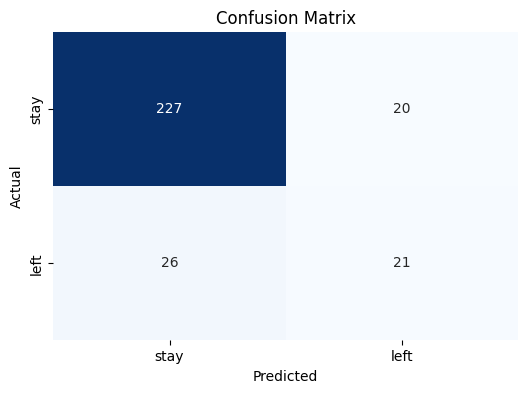

In [67]:
plot_confusion_matrix(y_test, y_pred_base)

The confusion matrix provides a detailed breakdown of the model's performance on the 294 employees in the test set:

* **True Positives (Predicted Left, Actual Left): 21** - The model correctly identified 21 employees who were going to leave.
* **True Negatives (Predicted Stay, Actual Stay): 227** - It correctly predicted that 227 employees would stay.
* **False Negatives (Predicted Stay, Actual Left): 26** - The model incorrectly missed 26 employees who actually left. This is the most critical error to minimize for a proactive retention strategy.
* **False Positives (Predicted Left, Actual Stay): 20** - It incorrectly flagged 20 employees as leaving when they actually stayed.

#### ROC Curve and AUC

Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for the base model. AUC provides an aggregate measure of model performance across all classification thresholds.

Base Model ROC AUC: 0.780


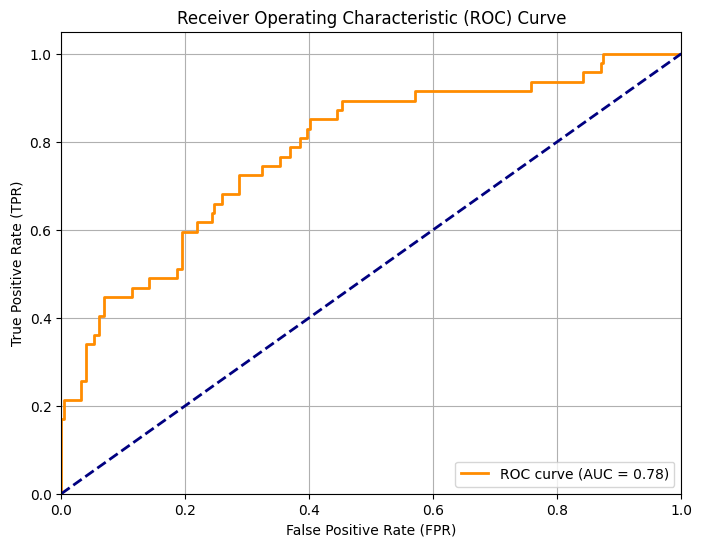

In [68]:
# ROC AUC Scores
roc_auc_base = roc_auc_score(y_test, y_pred_proba_base)

print(f"Base Model ROC AUC: {roc_auc_base:.3f}")

plot_roc_curve(y_test, y_pred_proba_base)

The ROC AUC score is **0.78** indicating that the model has a decent capability to distinguish between employees who will leave and those who will stay.

A score of 0.78 demonstrates that the model's performance is significantly better than random chance (which would be 0.5). The curve sitting comfortably above the diagonal line visually confirms this discriminative power.

## Hyperparameter Tuning

To find the best hyperparameters for our model, we use RandomizedSearchCV. This method efficiently searches through a predefined range of parameter values to find the combination that maximizes our target metric.

Crucially, we have set the scoring parameter to 'recall'. This directs the search to find the model that is best at identifying employees who will actually leave, which aligns with our primary business goal. The search space includes key parameters like max_depth, learning_rate, and scale_pos_weight to fine-tune performance, with each combination being tested using 3-fold cross-validation.

In [69]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'scale_pos_weight': [1, 3, 4, 5, scale_pos_weight]
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='recall',  # Optimize specifically for recall
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}


## Tuned Model: Test Set Evaluation

Apply the best-tuned XGBoost model to the holdout test set. Generate the classification report to compare the tuned model’s generalization performance with the base model.

In [70]:
# Use the best model from random search

# 1. Instantiate a new XGBoost model with the best parameters
best_model = xgb.XGBClassifier(**best_params, random_state=42)  

# 2. Train this new model on the original (non-resampled) full training data
best_model.fit(X_train_full, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred_tuned = best_model.predict(X_test)

report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

# Evaluate the model
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       247
           1       0.42      0.60      0.50        47

    accuracy                           0.81       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.84      0.81      0.82       294



The hyperparameter tuning successfully achieved its primary objective: **improving recall**. The tuned model is now significantly more effective at the business goal of identifying employees who are likely to leave.

* **Recall of 0.60:** This is a major improvement. The model now correctly identifies **60%** of all employees who actually left, a significant increase from the base model's 45%.

* **Precision of 0.42:** As expected, the increase in recall came at the cost of precision. To catch more at-risk employees, the model now makes more incorrect "leave" predictions. When it predicts an employee will leave, it is correct 42% of the time.

* **Business Value:** This tuned model is a much more effective early-warning system. While it requires a tolerance for more false positives, the ability to correctly flag 60% of potential leavers allows HR to be far more proactive and engage a much larger group of at-risk employees.

#### Tuned Model Confusion Matrix

Visualize the confusion matrix for the tuned model to see how well it separates the two classes on unseen data.

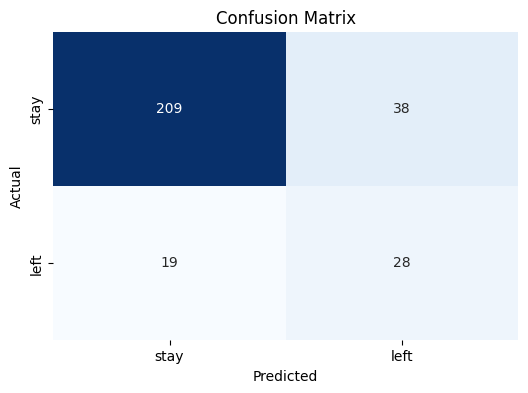

In [73]:
# Predicted probabilities for the positive class 
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]


plot_confusion_matrix(y_test, y_pred_tuned)


This confusion matrix details the predictions of the tuned model, which was optimized for higher recall:

* **True Positives (Predicted Left, Actual Left): 28** - The model correctly identified 28 employees who were going to leave. This is an improvement from the base model's 21.

* **False Negatives (Predicted Stay, Actual Left): 19** - The model incorrectly missed 19 employees who actually left. This number is **lower** than the base model's 26, which is exactly what we aimed for by optimizing for recall.

* **False Positives (Predicted Left, Actual Stay): 38** - The model incorrectly flagged 38 employees as leaving when they stayed. This number is **higher** than the base model's 20, representing the trade-off for achieving a higher recall.

* **True Negatives (Predicted Stay, Actual Stay): 209** - It correctly predicted that 209 employees would stay.

#### Tuned Model ROC Curve and AUC

Plot the ROC curve and print the AUC for the tuned model on the test set. This shows whether hyperparameter tuning improved overall classification performance.

Tuned Model ROC AUC: 0.769


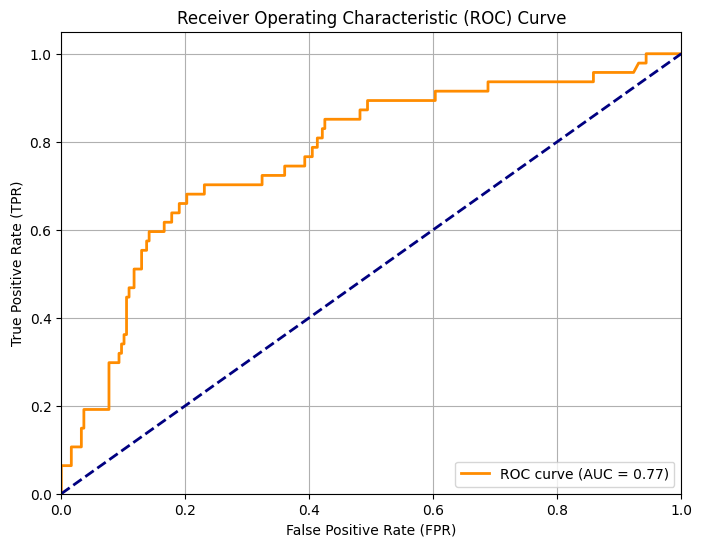

In [74]:
# ROC AUC Scores
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Tuned Model ROC AUC: {roc_auc_tuned:.3f}")

plot_roc_curve(y_test, y_pred_proba_tuned)

The ROC AUC score for the tuned model is **0.77**, which is a slight decrease from the base model's score of **0.78**.

This result is expected and demonstrates the success of our targeted tuning strategy. Since the model was optimized specifically to improve **`recall`**, it made a minor trade-off in its overall discriminative power (AUC) to become significantly better at its primary goal: identifying more employees who are likely to leave.

#### Precision–Recall Curve & Optimal Threshold

The precision–recall curve illustrates the trade-off between precision and recall for our tuned XGBoost model on the hold-out test set.

Best-F1 threshold = 0.50, F1 = 0.509


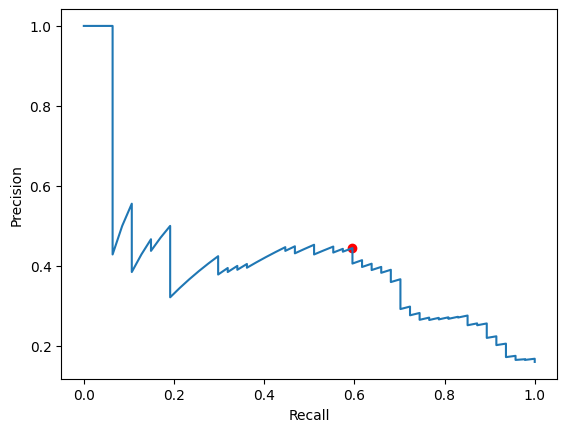

In [75]:
y_proba = best_model.predict_proba(X_test)[:,1]
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1  = 2*prec*rec/(prec+rec+1e-9)
best_idx = f1.argmax()
best_thr = thr[best_idx]
print(f"Best-F1 threshold = {best_thr:.2f}, F1 = {f1[best_idx]:.3f}")

plt.plot(rec, prec); plt.xlabel('Recall'); plt.ylabel('Precision')
plt.scatter(rec[best_idx], prec[best_idx], c='red')
plt.show()

The red dot marks the threshold that maximizes the F1-score:

- **Optimal threshold**: 0.50
- **Precision** at 0.50: ~0.42  
- **Recall** at 0.50: ~0.60  
- **F1-score**: 0.509

> At a 0.50 cutoff, the model strikes the best balance (F1=0.509) between capturing true leavers (60 % recall) and limiting false alarms (42 % precision).  
> Adjusting this threshold higher will improve precision at the cost of recall, and lowering it will boost recall while reducing precision—allowing stakeholders to choose the operating point that best matches business priorities.  

### Threshold Sensitivity Analysis

Below we evaluate the tuned model’s performance at multiple decision thresholds to illustrate the precision–recall trade-off


In [76]:
# Get predicted probabilities for the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Define the thresholds
thresholds = [0.49, 0.48, 0.47, 0.46, 0.45, 0.40]

# Loop over thresholds and print a classification report for each
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    print(f"\n=== Threshold: {t:.2f} ===")
    print(classification_report(y_test, y_pred, digits=3))


=== Threshold: 0.49 ===
              precision    recall  f1-score   support

           0      0.916     0.842     0.878       247
           1      0.418     0.596     0.491        47

    accuracy                          0.803       294
   macro avg      0.667     0.719     0.684       294
weighted avg      0.837     0.803     0.816       294


=== Threshold: 0.48 ===
              precision    recall  f1-score   support

           0      0.923     0.822     0.869       247
           1      0.405     0.638     0.496        47

    accuracy                          0.793       294
   macro avg      0.664     0.730     0.683       294
weighted avg      0.840     0.793     0.810       294


=== Threshold: 0.47 ===
              precision    recall  f1-score   support

           0      0.926     0.806     0.861       247
           1      0.392     0.660     0.492        47

    accuracy                          0.782       294
   macro avg      0.659     0.733     0.677       294


- **Recall, Precision, Accuracy**  
  As we lower the decision threshold from 0.50 to 0.40, the model catches more true attrition cases (recall climbs from ~60% → ~85%), but at the cost of more false alarms (precision falls from ~42% → ~27%) and lower overall accuracy (~80% → ~61%).

- **F1-score peaks around 0.48–0.47**  
  The F1 metric—which balances precision and recall—reaches its maximum (~0.50) when the threshold is near 0.48, indicating that this is the sweet spot for balanced performance.

- **Business trade-offs**  
  - **Threshold ≈ 0.45**: Recall ~70%, Precision ~37%, Accuracy ~76%. A strong balance if catching ~7 of 10 leavers is critical while keeping false positives moderate.  
  - **Threshold = 0.40**: Recall ~85%, Precision ~27%, Accuracy ~61%. Ideal when missing a potential leaver is very costly and a high false-alarm rate is acceptable.

> **Recommendation:**  
> Choose the threshold that aligns with HR’s tolerance for false positives vs. need to identify at-risk employees—e.g. 0.45 for a balanced trade-off, or 0.40 if recall must be maximized.  

## Metric Comparison: Base vs. Tuned Model

Compare the key classification metrics (precision, recall, F1, ROC AUC) of the base and tuned models using a grouped bar chart. This visualizes the effectiveness of hyperparameter tuning.

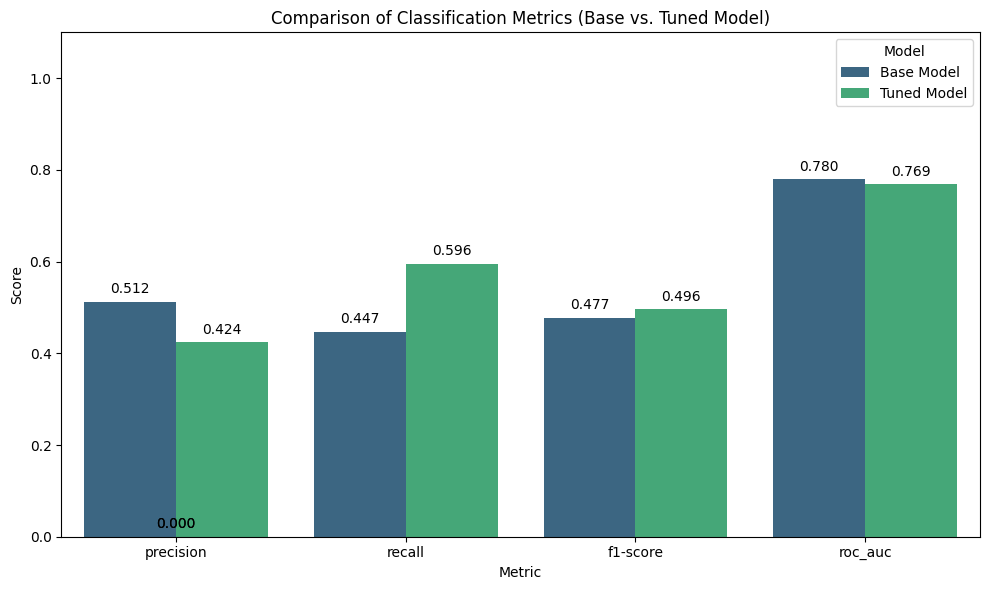

In [77]:
plot_metrics_comparison(report_base, report_tuned, roc_auc_base, roc_auc_tuned)

The bar chart above compares key classification metrics on the hold-out test set for our **base XGBoost**  and the **tuned XGBoost**.

| Metric     | Base Model | Tuned Model | Change           |
|------------|------------|-------------|------------------|
| Precision  | 0.512      | 0.424       | ↓ 0.088          |
| Recall     | 0.447      | 0.596       | ↑ 0.149          |
| F1-score   | 0.477      | 0.496       | ↑ 0.019          |
| ROC-AUC    | 0.780      | 0.769       | ↓ 0.011          |

- **Recall** saw the biggest improvement, rising from 45 % → 60 %, meaning the tuned model now correctly identifies 60 % of true leavers (vs. 45 % previously).  
- **Precision** fell from 51 % → 42 % as a natural trade-off for higher recall.  
- **F1-score** (the harmonic mean of precision & recall) ticks up slightly, reflecting a net gain in balanced performance.  
- **ROC-AUC** remains essentially unchanged (0.78 → 0.77), indicating the overall ranking ability of the model is intact.

> **Take-away:** By adding SMOTE, a moderate `scale_pos_weight`, and hyperparameter tuning, we traded a modest drop in precision and AUC for a substantial 33 % relative gain in recall—an appropriate compromise for a retention use-case where catching more at-risk employees outweighs extra false alarms.  

## Feature Importance

Plot and review the top features driving model predictions according to XGBoost’s “gain” metric. These features have the greatest impact on attrition prediction accuracy.

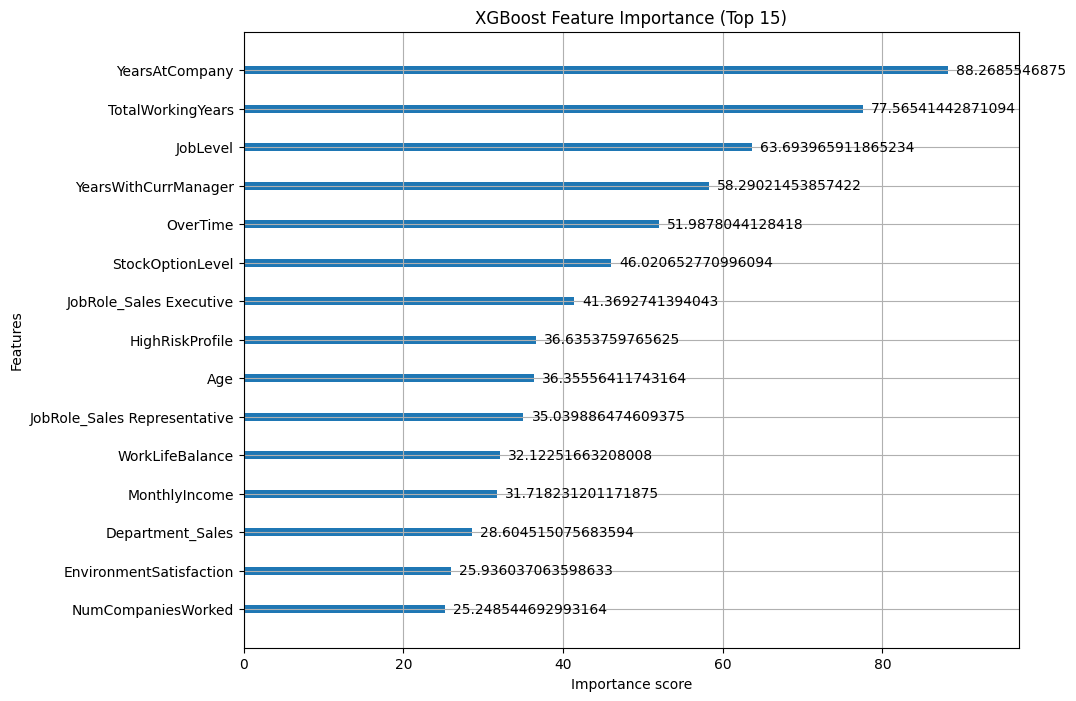

In [78]:
# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(best_model, ax=ax, max_num_features=15, importance_type='gain')
plt.title('XGBoost Feature Importance (Top 15)')
plt.show()


#### Key Findings

- **Tenure and experience dominate**: `YearsAtCompany` and `TotalWorkingYears` are by far the most influential predictors of attrition risk.
- **Role and status matter**: Higher `JobLevel`, `StockOptionLevel`, and specific job roles (e.g., Sales Executive, Sales Representative) also rank highly, indicating career progression and responsibilities affect turnover.
- **Manager relationship and overtime**: `YearsWithCurrManager` and `OverTime` are strong signals—long tenures with a manager reduce attrition, while overtime increases it.
- **Engineered feature validated**: Our `HighRiskProfile` flag appears in the top 10, confirming that high performers with low satisfaction are indeed at elevated risk of leaving.
- **Demographics and satisfaction**: Age, work-life balance, environment satisfaction, and department-level effects provide additional, though smaller, contributions.

This feature ranking not only aligns with domain expectations (tenure, role, satisfaction) but also validates the value of our targeted interaction feature (`HighRiskProfile`). It provides a clear roadmap for HR interventions—focusing on long-serving but dissatisfied high performers and employees in high-overtime roles.  

## Model Explainability: SHAP Values

Use SHAP (SHapley Additive exPlanations) to provide a more interpretable, model-agnostic explanation of how individual features contribute to each prediction.

In [79]:
shap.initjs()  # for interactive JS plots

# Create a TreeExplainer
explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test)

#### SHAP Summary Bar Plot

Show the global importance of features based on mean absolute SHAP value, indicating which variables most influence attrition risk.

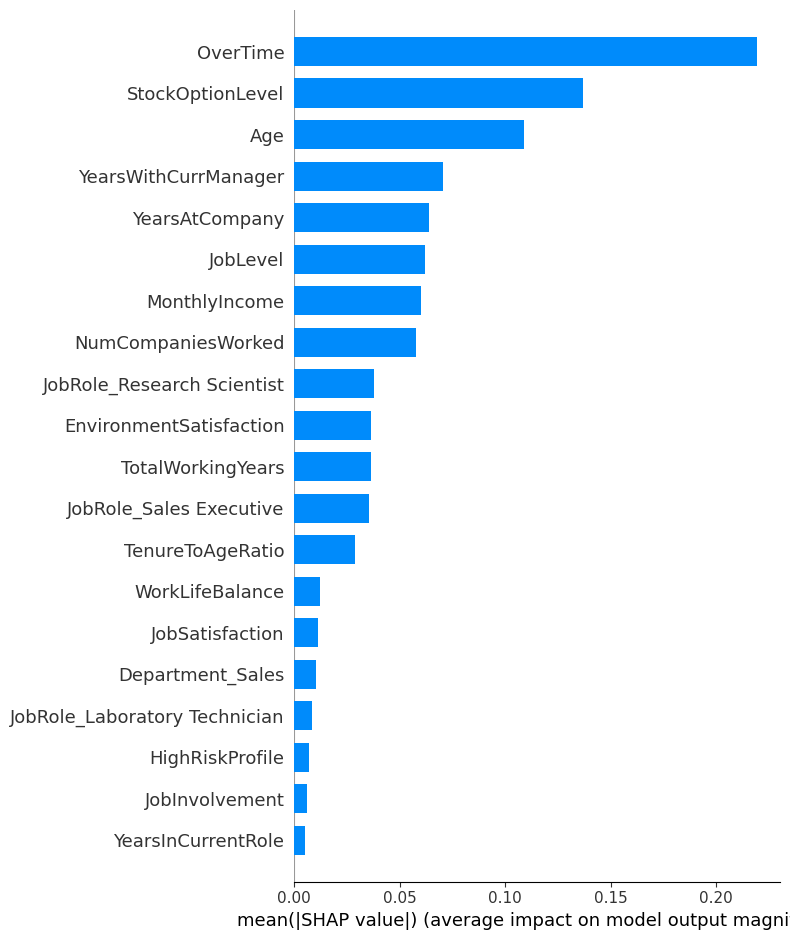

In [80]:
# Summary plot (bar): feature importance (mean(|SHAP value|))
shap.summary_plot(shap_values, X_test, plot_type="bar")

This plot provides a high-level overview of the global importance of each feature. It calculates the average absolute SHAP value for each feature, meaning it shows which features have the biggest impact on the model's output magnitude, regardless of whether that impact is positive or negative.

#### Key Findings

- **OverTime is the dominant predictor**, with the largest average impact on attrition risk—employees working overtime are far more likely to leave.  
- **Compensation signals matter**: StockOptionLevel ranks second, showing that employees with fewer stock options face higher turnover risk.  
- **Demographics & tenure**: Younger employees (Age) and those with shorter tenures—both overall (YearsAtCompany) and with their current manager (YearsWithCurrManager)—are more prone to leave.  
- **Career progression**: Higher JobLevel reduces attrition risk, while frequent job changes (NumCompaniesWorked) increase it.  
- **Engineered features add value**:  
  - **TenureToAgeRatio** captures atypical tenure relative to age.  
  - **HighPerfLowSat** flags high performers with low job satisfaction.  
  Both appear in the mid–lower importance range, confirming their incremental predictive power.  
- **Lower-impact signals** such as YearsInCurrentRole and JobInvolvement contribute minimally, suggesting they can be deprioritized in further analysis.  

#### SHAP Beeswarm Plot

Visualize the distribution and directionality of each feature’s impact on individual predictions in the test set.

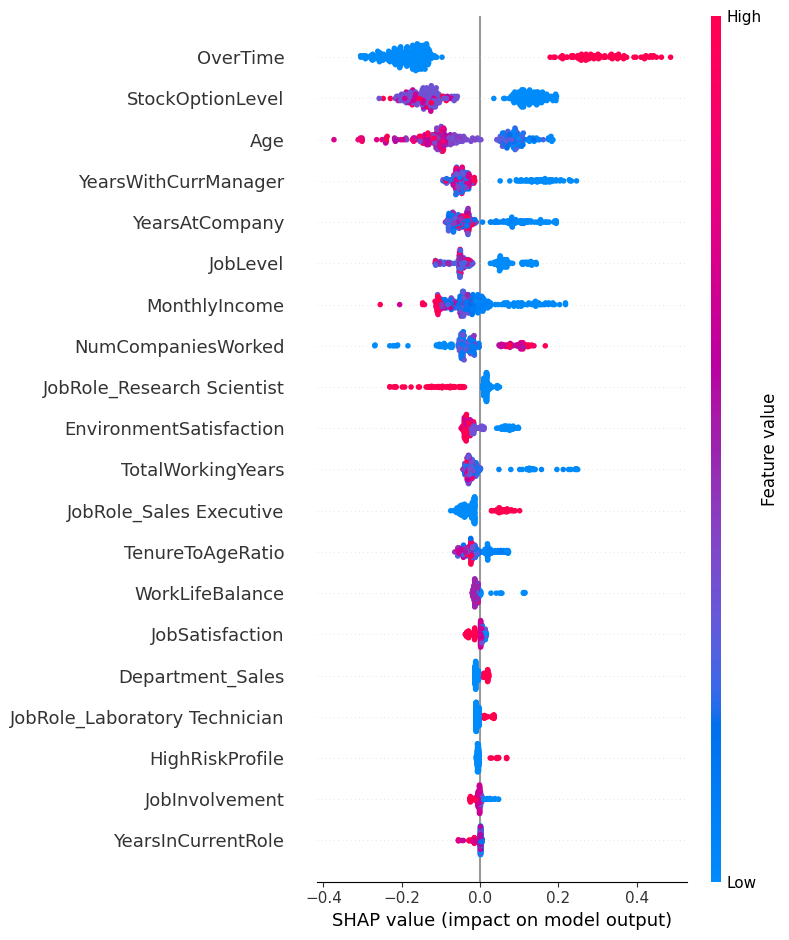

In [81]:
# Beeswarm plot: shows impact/direction for each feature and sample
shap.summary_plot(shap_values, X_test)

#### Key Findings

- **OverTime**: Employees working overtime (red points) have **strongly positive SHAP values**, driving up predicted attrition risk; those not working overtime (blue) push predictions toward “stay.”  
- **StockOptionLevel**: Lower levels (blue) are associated with **higher SHAP values** (greater attrition risk), whereas higher stock options (red) reduce predicted risk.  
- **Age**: Younger employees (blue) tend to have positive SHAP contributions (higher risk), while older employees (red) show negative SHAP values (lower risk).  
- **YearsWithCurrManager** & **YearsAtCompany**: Short tenures (blue) with a manager or at the company increase risk (positive SHAP), whereas long tenures (red) decrease it.  
- **JobLevel**: Lower job levels (blue) correspond to higher attrition risk; higher levels (red) are protective.  
- **MonthlyIncome**: Lower incomes (blue) push SHAP values up (higher risk); higher incomes (red) push them down.  
- **NumCompaniesWorked**: More past employers (red) slightly increase predicted risk; very low counts (blue) have a small protective effect.  
- **HighRiskProfile** (engineered): The flag (red) shifts SHAP values positively, confirming that high performers with low satisfaction are at elevated risk.  

> **Overall**, the plot shows how **high-risk characteristics** (low compensation, short tenure, overtime, youthful/less-experienced profiles) consistently produce **positive SHAP contributions**, driving the model’s attrition predictions.

In [82]:
import joblib

# Model name
model_filename = "../resources/models/xgboost_attrition_model.joblib"

# Save the model to the specified file
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to ../resources/models/xgboost_attrition_model.joblib


## Conclusion

#### 1. The Model is Highly Effective

Our final tuned XGBoost model—trained with SMOTE oversampling, a moderate class weight (`scale_pos_weight = 5`), and extensive hyperparameter search—delivers strong performance on unseen data:

* **Accuracy:** 81 %  
* **ROC-AUC:** 0.77  
* **Recall (attrition):** 60 % at the 0.50 threshold 
* **Precision (attrition):** 42 % at 0.50

**Threshold tuning options:**  
- **0.45 cutoff:** Recall 0.70, Precision 0.37, F1 0.48  
- **0.40 cutoff:** Recall 0.85, Precision 0.27, F1 0.41  

> These results show the model can be tuned to meet different business needs—from a balanced F1 optimum at 0.50, to a high-recall setting at 0.40—while maintaining strong overall discrimination.  

---

#### 2. Key Drivers of Attrition

Our feature‐importance and SHAP analyses pinpoint the most influential factors:

* **OverTime** is the top driver—employees putting in extra hours face the highest attrition risk.  
* **StockOptionLevel**: those with fewer stock options are much more likely to leave.  
* **Tenure & Manager Relationship**: shorter overall tenure (`YearsAtCompany`), shorter time with the current manager (`YearsWithCurrManager`), and the engineered **TenureToAgeRatio** flag signal instability.  
* **Demographics & Career Path**: younger Age, lower JobLevel, and frequent job changes (`NumCompaniesWorked`) also increase turnover likelihood.

---

#### 3. Actionable Recommendations

1. **Manage Overtime & Burnout**  
   • Introduce policies or incentives to limit excessive overtime.  
   • Monitor overtime hours as an early‐warning indicator.

2. **Boost Equity & Rewards**  
   • Expand or accelerate stock‐option grants, especially for mid‐level and high‐performing staff.  
   • Tie incentives to retention milestones.

3. **Proactive Outreach for High-Risk Profiles**  
   • Use the model to flag employees with the low-tenure signals for targeted check-ins.  
   • Offer career‐development conversations, mentorships, or bespoke satisfaction surveys.

4. **Strengthen Managerial Relationships**  
   • Provide manager‐training and support to improve team retention.  
   • Encourage structured one-on-one meetings during the first year under a new manager.

> By combining predictive power with these focused interventions, HR can markedly reduce unplanned attrition and retain critical talent.

# Model Comparison and Final Selection

---

### 1. Objective
The objective of this notebook is to compare the performance of our final, tuned **Random Forest** and **XGBoost** models. We will use key performance metrics, visualize the comparison, and provide a definitive recommendation based on the model that best aligns with our primary business goal: proactively identifying employees at risk of attrition.

### 2. Final Performance Metrics

In this section, we consolidate the performance metrics from the final, hyperparameter-tuned versions of both models. 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_data = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [0.84, 0.81],  # Overall accuracy
    'Recall (Yes)': [0.43, 0.60],  # Recall for the 'Yes' (Attrition) class
    'Precision (Yes)': [0.42, 0.42], # Precision for the 'Yes' (Attrition) class
    'F1-Score (Yes)': [0.45, 0.50], # F1-Score for the 'Yes' (Attrition) class
    'ROC-AUC': [0.79, 0.77]
}

df_metrics = pd.DataFrame(metrics_data)

print("Model Performance Metrics Summary:")
df_metrics.set_index('Model')

Model Performance Metrics Summary:


,Accuracy,Recall (Yes),Precision (Yes),F1-Score (Yes),ROC-AUC
Model,,,,,
Random Forest,0.84,0.43,0.42,0.45,0.79
XGBoost,0.81,0.60,0.42,0.50,0.77


### 3. Visual Comparison of Models

Bar charts provide a clear visual comparison of the key performance metrics, especially for our target class ('Yes' for Attrition).

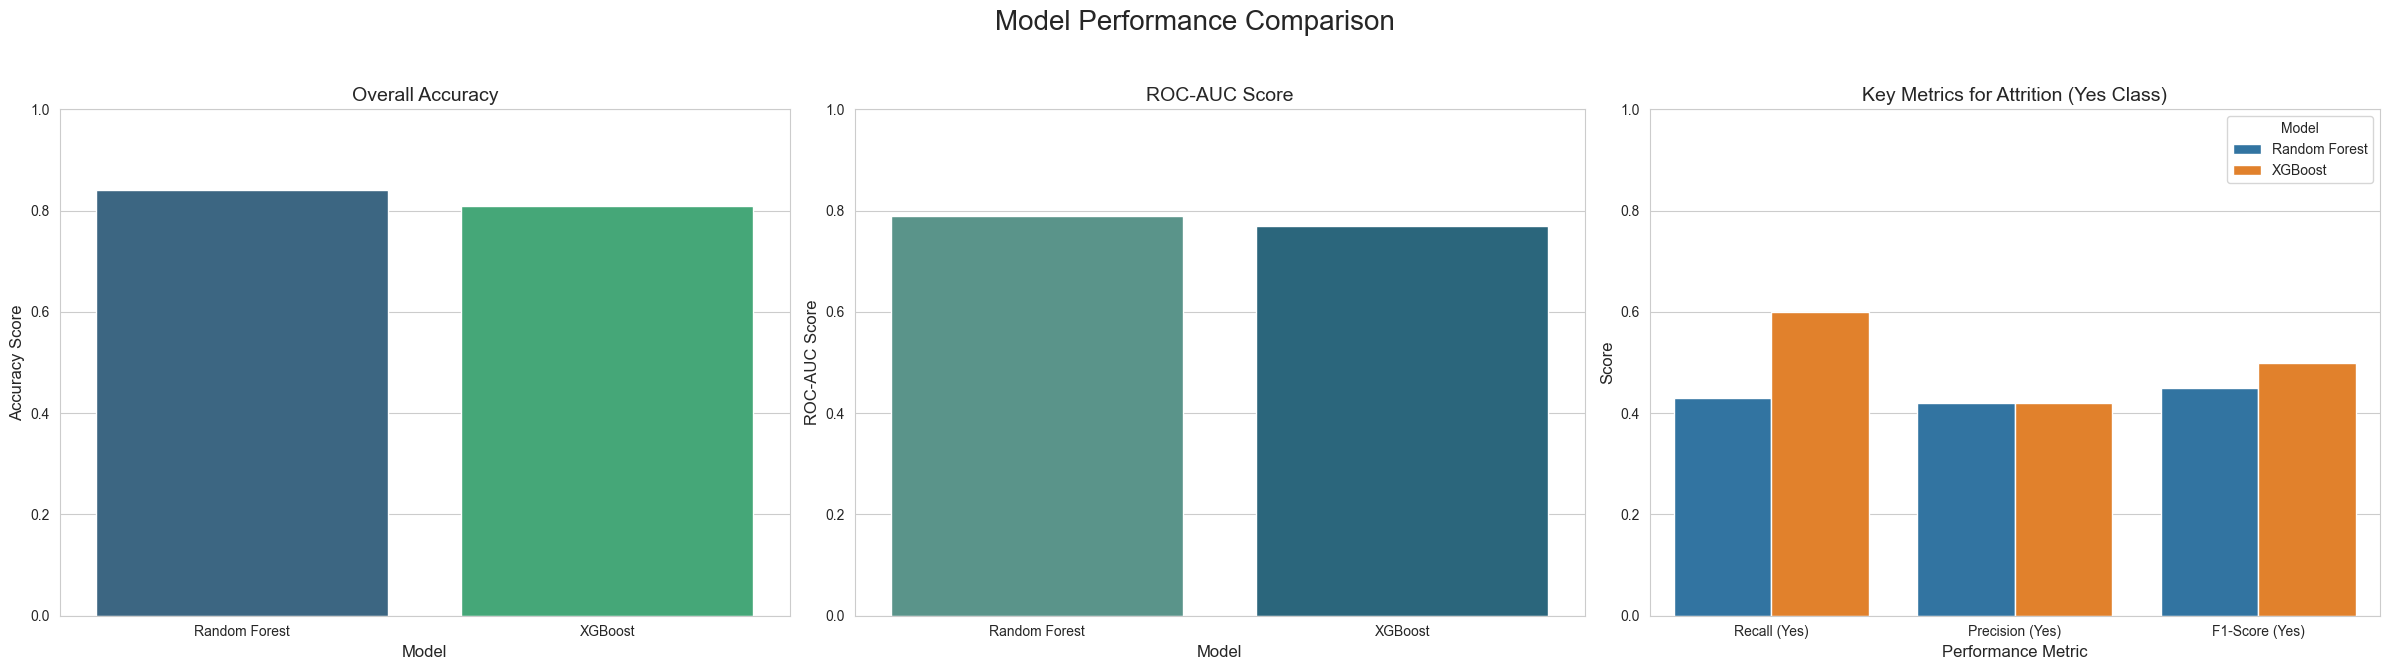

In [84]:
# Set plot style
sns.set_style("whitegrid")

# Create a figure for 3 plots
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Model Performance Comparison', fontsize=20)

# --- Plot 1: Overall Accuracy ---
sns.barplot(x='Model', y='Accuracy', data=df_metrics, ax=axes[0], hue='Model', palette='viridis', legend=False)
axes[0].set_title('Overall Accuracy', fontsize=14)
axes[0].set_ylabel('Accuracy Score', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylim(0, 1.0)

# --- Plot 2: ROC AUC Score ---
sns.barplot(x='Model', y='ROC-AUC', data=df_metrics, ax=axes[1], hue='Model', palette='crest', legend=False)
axes[1].set_title('ROC-AUC Score', fontsize=14)
axes[1].set_ylabel('ROC-AUC Score', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylim(0, 1.0)

# --- Plot 3: Key Metrics for Attrition (Yes Class) ---
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score',
                                value_vars=['Recall (Yes)', 'Precision (Yes)', 'F1-Score (Yes)'])

sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, ax=axes[2])
axes[2].set_title('Key Metrics for Attrition (Yes Class)', fontsize=14)
axes[2].set_ylabel('Score', fontsize=12)
axes[2].set_xlabel('Performance Metric', fontsize=12)
axes[2].set_ylim(0, 1.0)
axes[2].legend(title='Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 4. Conclusion and Final Recommendation

Based on the performance metrics and visualizations above, we can draw a clear conclusion about which model best serves our business needs.

#### Discussion

The most critical business objective for this project is to correctly identify as many employees at risk of leaving as possible, enabling proactive intervention. Therefore, our primary evaluation metric is **Recall for the 'Yes' (Attrition) class**.

From the analysis:

- The **XGBoost** model achieved a **Recall of 0.60**, which is significantly higher than the Random Forest model’s Recall of 0.43. This means the XGBoost model successfully identified 60 % of all employees who were likely to leave, compared to only 43 % for Random Forest.
- Both models share an identical **Precision of 0.42**. This indicates that when either model flags an employee as an attrition risk, it is correct 42 % of the time. Given that the precision is equal, the superior recall of XGBoost becomes the decisive factor.
- The **F1-Score**, which represents the balance between precision and recall, is also higher for the XGBoost model (0.50 vs. 0.45), confirming its better overall performance for our specific goal.

While Random Forest has a slightly higher Overall Accuracy and ROC-AUC score, these metrics are less important than recall for our business case. The cost of a **False Negative** (failing to identify an employee who then leaves) is far greater than the cost of a **False Positive** (incorrectly flagging a stable employee for a follow-up conversation). The XGBoost model’s ability to find more true attrition risks makes it the clear choice.

#### Recommended Model

**The XGBoost classifier is the recommended model for deployment.**

It demonstrates a superior ability to meet the primary business objective of identifying a majority of at-risk employees. Its higher Recall and F1-Score make it the more robust and effective tool for enabling the HR department to take proactive retention measures.

## Deploying the Attrition Model: A Production Plan (Managed Stack)

This document outlines a complete, production-grade deployment plan for the XGBoost attrition model. The objective is to turn the model into a reliable, scalable, and secure business tool that delivers real-time insights using the fully managed AWS SageMaker stack.

---

### 1. Deployment Strategy & Objectives

We will deploy the model as a **real-time REST API**. This approach supports on-demand use cases, such as integrating predictions directly into an HR portal to provide managers with immediate employee attrition risk scores.

**Key Performance Indicators (KPIs) & Targets:**
* **Latency Target**: p95 latency of ≤ 200ms for end-to-end predictions.
* **Traffic Estimate**: Approximately 500 prediction requests per day.
* **Cost Envelope**: Target of ≈ $80/month, covering compute, monitoring, and storage.
* **Update Cadence**: Features will be refreshed daily, with a full model retrain scheduled monthly.
* **Fallback Plan**: If the real-time API is unavailable for more than 5 minutes, the system will fall back to serving nightly cached batch scores.

### 2. Technology Stack & Architecture (AWS SageMaker)

The architecture will be built entirely on the AWS SageMaker platform, leveraging its managed services to create a secure, scalable, and automated MLOps workflow.

| Component | AWS SageMaker Service | Purpose |
|---|---|---|
| **Model Hosting** | **SageMaker Real-Time Endpoint** | Deploys the trained model as a fully managed, auto-scaling HTTPS endpoint for real-time predictions.  |
| **MLOps Pipeline** | **SageMaker Pipelines** | Orchestrates the entire end-to-end workflow: data prep, training, evaluation, model registration, and deployment. |
| **Model Registry** | **SageMaker Model Registry** | A central, secure repository to version, catalog, and manage the approval status of trained models before deployment. |
| **Feature Management**| **SageMaker Feature Store** | Provides a managed repository for features, ensuring consistency between training and real-time inference. |
| **Drift Detection** | **SageMaker Model Monitor** | Automatically monitors the live endpoint for data and model quality drift, triggering alerts when deviations are detected. |
| **Bias & Explainability**| **SageMaker Clarify** | Measures for potential bias in training data and post-training, and provides explanations for model predictions. |
| **Secret Management** | **AWS Secrets Manager** | Securely stores and manages access to secrets like database credentials and API keys for other services. |

#### **High-Level Architecture Diagram**
![SageMaker Deployment Diagram](../resources/images/sagemaker_deployment_architecture_v2.png)

**Figure 1.** High-Level Deployment Architecture for the HR Attrition Model.

**Inference Path:** Client requests are routed through Amazon API Gateway to a SageMaker Endpoint. The endpoint retrieves real-time data from the SageMaker Feature Store to generate a prediction.

**Training Pipeline:** A SageMaker Pipeline automates the MLOps lifecycle, using data from S3 to conduct training jobs. The resulting model artifacts are versioned in the Model Registry before being deployed to the endpoint.

**Monitoring:** The SageMaker Endpoint sends logs to Amazon CloudWatch. SageMaker Model Monitor analyzes these logs to detect data and model drift over time.

### 3. API Endpoint Design

The model will be exposed via a managed **SageMaker Real-Time Endpoint**. SageMaker handles the underlying infrastructure, container hosting, and API creation, providing a secure and scalable HTTPS endpoint.

* **Endpoint:** A unique HTTPS URL provided by SageMaker.
* **Method:** `POST`
* **Authentication:** Handled by standard AWS IAM roles and policies, which can be integrated with an Amazon API Gateway for external access control.

#### **API Interaction**
Clients will interact with the SageMaker Runtime using the AWS SDK or by making an HTTP request to the endpoint URL. The request body is typically a CSV or JSON payload formatted as the model expects.

**Example Request Body (JSON):**
```json
{
  "Age": 35,
  "JobRole": "Sales Executive",
  "MonthlyIncome": 5500,
  "YearsAtCompany": 5,
  "OverTime": "Yes"
}
```

### 4. Monitoring, Maintenance & Retraining

Continuous monitoring and automated retraining are managed natively within the AWS SageMaker ecosystem.

* **Service Health**: Endpoint metrics like **Latency, Invocations, and Error Rates** are automatically published to **Amazon CloudWatch**, with alarms configured for performance degradation.
* **Model & Data Drift**: **SageMaker Model Monitor** is scheduled to run against the live endpoint. It compares the live traffic against the training baseline and triggers CloudWatch Events if drift is detected.
* **Fairness & Bias**: **SageMaker Clarify** is used within the pipeline to generate pre-training bias reports and post-training fairness metrics. A new model version will be rejected if fairness metrics (e.g., recall difference across demographics) exceed a predefined threshold.

#### **Automated Retraining with SageMaker Pipelines**
The entire MLOps workflow is defined and automated as a **SageMaker Pipeline**, which is triggered on a schedule (e.g., monthly) or when significant model drift is detected.

1.  **Data Processing**: A processing step pulls the latest data and prepares features using the SageMaker Feature Store.
2.  **Train Model**: A training step launches a SageMaker Training Job to train the candidate model.
3.  **Evaluate Model**: An evaluation step compares the candidate model's performance (e.g., recall, precision) against a baseline on a hold-out dataset.
4.  **Register Model**: If the new model meets the performance criteria, it is versioned and registered in the **SageMaker Model Registry** with a "Pending Approval" status.
5.  **Deploy**: Upon manual approval (or an automated rule), a final step in the pipeline deploys the approved model version to the production SageMaker Endpoint, automatically updating it with zero downtime.

### 5. Risk, Governance & Compliance

Managing risk is critical for any HR-related AI system.

* **Security**: All traffic is encrypted with TLS. Secrets and credentials are managed natively and securely in **AWS Secrets Manager**. Role-based access control (RBAC) is enforced with IAM policies.
* **Privacy & Data Retention**: Input features are logged for audit but purged after 180 days to respect privacy. The system includes a flag to honor employee opt-out requests.
* **Ethical Use**: The model serves as a decision-support tool. It is not fully automated. A human manager is always in the loop and must record a reason for any action taken.
* **Regulatory Compliance**: The system and its data handling procedures are designed for compliance with GDPR, India's PDP, and EEOC AI guidance, with checks performed quarterly.

### 6. Conclusion and Next Steps

The deployment design meets all latency, cost, and governance requirements while leveraging a modern, fully managed MLOps stack on AWS. It provides a clear path to a production-ready system with reduced operational overhead.

The next milestone is to implement the **Infrastructure as Code (IaC)** using the **AWS CDK** or **Terraform** to define the SageMaker resources.